# Курсовая работа Ленгауэр Артём ПИ20-3

### Импорт нужных библиотек и загрузка датасета

Импортирую библиотеки

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Загружаю данные из файла "DataSet.xlsx"

In [80]:
df = pd.read_excel('DataSet.xlsx', skiprows = 4, header=0, usecols=[i for i in range(1,14)])

### Обзор исходных данных

Данный датасет предоставляет информацию о продажах продукции Adidas в Америке за 2020-2021 год.

In [81]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


Количественные параметры датасета

In [82]:
df.shape

(9648, 13)

In [83]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


Количество уникальных значений

In [84]:
column_names = df.columns
print("Количество уникальных значений:")
for i in range(13):
    print(str(column_names[i])+":", df.iloc[:, i].nunique())

Количество уникальных значений:
Retailer: 6
Retailer ID: 4
Invoice Date: 724
Region: 5
State: 50
City: 52
Product: 6
Price per Unit: 146
Units Sold: 361
Total Sales: 3512
Operating Profit: 6510
Operating Margin: 127
Sales Method: 3


Тип признаков

In [85]:
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

Количество пропусков

In [86]:
print("Количество пропусков:")
for i in range(13):
    print(column_names[i] + ":",sum(df.iloc[:, i].isna()))

Количество пропусков:
Retailer: 0
Retailer ID: 0
Invoice Date: 0
Region: 0
State: 0
City: 0
Product: 0
Price per Unit: 0
Units Sold: 0
Total Sales: 0
Operating Profit: 0
Operating Margin: 0
Sales Method: 0


### Преобразование данных

Для начала нужно представить все признаки в числовом види

#### Retailer

Исследую уникальные значения признака "Retailer". Ищу способ замены строковых данных на числовые значения.

In [87]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

Заменяю каждое уникальное значение на число

In [88]:
df["Retailer"] = pd.factorize(df["Retailer"])[0]

Проверяю, что все значения заменены и имеют тип int

In [89]:
df['Retailer'].unique()

array([0, 1, 2, 3, 4, 5])

#### Region

Исследую уникальные значения признака "Region". Ищу способ замены строковых данных на числовые значения.

In [90]:
df["Region"].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

С помощью метода get_dummies превращаю признак Region в несколько признаков, где единица означает принадлежность к данному региону, а 0 означает отсутствие принадлежности

In [91]:
df = pd.get_dummies(df, columns=['Region'])

In [92]:
df

,Retailer,Retailer ID,Invoice Date,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West
0,0,1185732,2020-01-01,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,0,1,0,0,0
1,0,1185732,2020-01-02,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,0,1,0,0,0
2,0,1185732,2020-01-03,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,0,1,0,0,0
3,0,1185732,2020-01-04,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,0,1,0,0,0
4,0,1185732,2020-01-05,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1185732,2021-01-24,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,0,1,0,0,0
9644,0,1185732,2021-01-24,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,0,1,0,0,0
9645,0,1185732,2021-02-22,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,0,1,0,0,0
9646,0,1185732,2021-02-22,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,0,1,0,0,0


#### State

Исследую признак "State" и его уникальные значения. Ищу способ замены строковых данных на числовые значения

In [93]:
df["State"].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

Заменяю каждое уникальное значение на число,  используя встроенные метод pandas factorize

In [94]:
df["State"] = pd.factorize(df["State"])[0]

In [95]:
df["State"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

#### City

Исследую признак "City" и его уникальные значения. Ищу способ замены строковых данных на числовые значения

In [96]:
df["City"].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

Аналогично State использую метод fasctorize библиотеки pandas

In [97]:
df["City"] = pd.factorize(df["City"])[0]

In [98]:
df["City"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [99]:
df

,Retailer,Retailer ID,Invoice Date,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West
0,0,1185732,2020-01-01,0,0,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,0,1,0,0,0
1,0,1185732,2020-01-02,0,0,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,0,1,0,0,0
2,0,1185732,2020-01-03,0,0,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,0,1,0,0,0
3,0,1185732,2020-01-04,0,0,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,0,1,0,0,0
4,0,1185732,2020-01-05,0,0,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1185732,2021-01-24,49,51,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,0,1,0,0,0
9644,0,1185732,2021-01-24,49,51,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,0,1,0,0,0
9645,0,1185732,2021-02-22,49,51,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,0,1,0,0,0
9646,0,1185732,2021-02-22,49,51,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,0,1,0,0,0


#### Product

Исследую признак "Product" и его уникальные значения. Ищу способ замены строковых данных на числовые значения

In [100]:
df["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

Так как уникальных значений не очень много, предлагаю использовать метод get_dummies

In [101]:
df = pd.get_dummies(df, columns=["Product"])

In [102]:
df

,Retailer,Retailer ID,Invoice Date,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,...,Region_Northeast,Region_South,Region_Southeast,Region_West,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,0,1185732,2020-01-01,0,0,50.0,1200,600000.0,300000.00,0.50,...,1,0,0,0,0,0,1,0,0,0
1,0,1185732,2020-01-02,0,0,50.0,1000,500000.0,150000.00,0.30,...,1,0,0,0,0,1,0,0,0,0
2,0,1185732,2020-01-03,0,0,40.0,1000,400000.0,140000.00,0.35,...,1,0,0,0,0,0,0,0,0,1
3,0,1185732,2020-01-04,0,0,45.0,850,382500.0,133875.00,0.35,...,1,0,0,0,0,0,0,0,1,0
4,0,1185732,2020-01-05,0,0,60.0,900,540000.0,162000.00,0.30,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1185732,2021-01-24,49,51,50.0,64,3200.0,896.00,0.28,...,1,0,0,0,1,0,0,0,0,0
9644,0,1185732,2021-01-24,49,51,41.0,105,4305.0,1377.60,0.32,...,1,0,0,0,0,0,0,1,0,0
9645,0,1185732,2021-02-22,49,51,41.0,184,7544.0,2791.28,0.37,...,1,0,0,0,0,0,1,0,0,0
9646,0,1185732,2021-02-22,49,51,42.0,70,2940.0,1234.80,0.42,...,1,0,0,0,0,1,0,0,0,0


#### Sales Method

Исследую признак "Sales Method" и его уникальные значения. Ищу способ замены строковых данных на числовые значения

In [103]:
df["Sales Method"].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

Использую метод fasctorize библиотеки pandas

In [104]:
df["Sales Method"] = pd.factorize(df["Sales Method"])[0]

In [105]:
df["Sales Method"].unique()

array([0, 1, 2])

In [106]:
df

,Retailer,Retailer ID,Invoice Date,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,...,Region_Northeast,Region_South,Region_Southeast,Region_West,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,0,1185732,2020-01-01,0,0,50.0,1200,600000.0,300000.00,0.50,...,1,0,0,0,0,0,1,0,0,0
1,0,1185732,2020-01-02,0,0,50.0,1000,500000.0,150000.00,0.30,...,1,0,0,0,0,1,0,0,0,0
2,0,1185732,2020-01-03,0,0,40.0,1000,400000.0,140000.00,0.35,...,1,0,0,0,0,0,0,0,0,1
3,0,1185732,2020-01-04,0,0,45.0,850,382500.0,133875.00,0.35,...,1,0,0,0,0,0,0,0,1,0
4,0,1185732,2020-01-05,0,0,60.0,900,540000.0,162000.00,0.30,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1185732,2021-01-24,49,51,50.0,64,3200.0,896.00,0.28,...,1,0,0,0,1,0,0,0,0,0
9644,0,1185732,2021-01-24,49,51,41.0,105,4305.0,1377.60,0.32,...,1,0,0,0,0,0,0,1,0,0
9645,0,1185732,2021-02-22,49,51,41.0,184,7544.0,2791.28,0.37,...,1,0,0,0,0,0,1,0,0,0
9646,0,1185732,2021-02-22,49,51,42.0,70,2940.0,1234.80,0.42,...,1,0,0,0,0,1,0,0,0,0


#### Invoice Date

Превращаю признак "Invoice Date" в три признака: "Year", "Month", "Day" 

In [107]:
df['Year'] = df['Invoice Date'].dt.year
df["Month"] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df = df.drop(["Invoice Date"], axis = 1)

#### Retailer ID

In [108]:
df = df.drop(["Retailer ID"], axis = 1)

In [109]:
df

,Retailer,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region_Midwest,...,Region_West,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Year,Month,Day
0,0,0,0,50.0,1200,600000.0,300000.00,0.50,0,0,...,0,0,0,1,0,0,0,2020,1,1
1,0,0,0,50.0,1000,500000.0,150000.00,0.30,0,0,...,0,0,1,0,0,0,0,2020,1,2
2,0,0,0,40.0,1000,400000.0,140000.00,0.35,0,0,...,0,0,0,0,0,0,1,2020,1,3
3,0,0,0,45.0,850,382500.0,133875.00,0.35,0,0,...,0,0,0,0,0,1,0,2020,1,4
4,0,0,0,60.0,900,540000.0,162000.00,0.30,0,0,...,0,1,0,0,0,0,0,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,49,51,50.0,64,3200.0,896.00,0.28,1,0,...,0,1,0,0,0,0,0,2021,1,24
9644,0,49,51,41.0,105,4305.0,1377.60,0.32,1,0,...,0,0,0,0,1,0,0,2021,1,24
9645,0,49,51,41.0,184,7544.0,2791.28,0.37,1,0,...,0,0,0,1,0,0,0,2021,2,22
9646,0,49,51,42.0,70,2940.0,1234.80,0.42,1,0,...,0,0,1,0,0,0,0,2021,2,22


### Обработка пропущенных значений и выбросов, а также нормализация данных

Так как пропусков в датасете нет, то обрабатывать их не нужно

После преобразования всех категориальных признаков в числовые, можно провести анализ остальных признаков. Предлагаю проверить признаки на наличие и количество выбросов

Функция для нахождения выбросов признака:

In [110]:
def find_ejection(df, feature):
    # определение межквартильного размаха
    Q1 = df[str(feature)].quantile(0.25)
    Q3 = df[str(feature)].quantile(0.75)
    IQR = Q3 - Q1

    # определение выбросов
    outliers = df[(df[str(feature)] < (Q1 - 1.5 * IQR)) | (df[str(feature)] > (Q3 + 1.5 * IQR))]
    num_outliers = len(outliers)
    length = len(df[str(feature)])
    print("Количество выбросов в признаке", str(feature), ":", num_outliers)
    print("Процент выбросов от общего количества строк в", str(feature), ":", round(num_outliers/length*100, 2), "% ")
    print()

In [111]:
needed_culumns = ["Price per Unit","Total Sales","Operating Profit","Units Sold"]
for i in range(len(needed_culumns)):
    find_ejection(df, needed_culumns[i])

Количество выбросов в признаке Price per Unit : 104
Процент выбросов от общего количества строк в Price per Unit : 1.08 % 

Количество выбросов в признаке Total Sales : 653
Процент выбросов от общего количества строк в Total Sales : 6.77 % 

Количество выбросов в признаке Operating Profit : 706
Процент выбросов от общего количества строк в Operating Profit : 7.32 % 

Количество выбросов в признаке Units Sold : 508
Процент выбросов от общего количества строк в Units Sold : 5.27 % 



In [112]:
df.dtypes

Retailer                               int64
State                                  int64
City                                   int64
Price per Unit                       float64
Units Sold                             int64
Total Sales                          float64
Operating Profit                     float64
Operating Margin                     float64
Sales Method                           int64
Region_Midwest                         uint8
Region_Northeast                       uint8
Region_South                           uint8
Region_Southeast                       uint8
Region_West                            uint8
Product_Men's Apparel                  uint8
Product_Men's Athletic Footwear        uint8
Product_Men's Street Footwear          uint8
Product_Women's Apparel                uint8
Product_Women's Athletic Footwear      uint8
Product_Women's Street Footwear        uint8
Year                                   int64
Month                                  int64
Day       

Заменяю тип uint8 на int64

In [113]:
for i in df.columns:
    if df[i].dtype == "uint8":
        df[i] = df[i].astype('int64')

Нормализация данных

In [114]:
column_name = "Units Sold"
df_copy = df
df_copy = df_copy.drop(column_name, axis=1)
scaler = MinMaxScaler()
df_copy = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

### Разделение данных на обучающую и тестовую выборки:

In [115]:
X = df_copy
y = df[column_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Создание модели прогнозирования объема потребления

#### Полносвязная модель

Класс создания модели

In [116]:
# Создаем нейронную сеть
class FullyConnected(nn.Module):
    def __init__(self):
        super(FullyConnected, self).__init__()
        self.fc1 = nn.Linear(22, 128) # 23 входных фичей, 128 скрытых нейрона
        self.fc2 = nn.Linear(128, 64) # 128 скрытых нейрона, 64 скрытых нейрона
        self.fc3 = nn.Linear(64, 32) # 64 скрытых нейрона, 32 скрытых нейрона
        self.fc4 = nn.Linear(32, 16) # 32 скрытых нейрона, 16 скрытых нейрона
        self.fc5 = nn.Linear(16, 1)  # 64 скрытых нейрона, 1 выход

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

Применение созданной модели

In [134]:
# Создаем экземпляр сети и определяем функцию потерь и оптимизатор
net = FullyConnected()

# Критерий ошибки
criterion = nn.MSELoss()

# Создаю оптимизатор
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)

# Обучаем сеть
inputs_train = torch.tensor(X_train.values).float()
labels_train = torch.tensor(y_train.values.reshape(-1,1)).float()

inputs_test = torch.tensor(X_test.values).float()
labels_test = torch.tensor(y_test.values.reshape(-1,1)).float()

# Цикл обучения модели
mse_history = []
r2_history = []
mae_history = []
rmse_history = []
mse_history_test = []

MSE_LOSS = 1000000000
epoch = 0
while MSE_LOSS > 200:
    optimizer.zero_grad()
    
    outputs = net(inputs_train)
    outputs_test = net(inputs_test)
    
    loss_train = criterion(outputs, labels_train)
    loss_test = criterion(outputs_test, labels_test)
    
    MSE_LOSS = loss_train.item()
    MSE_LOSS_TEST = loss_test.item()
    
    mse_history.append(MSE_LOSS)
    mse_history_test.append(MSE_LOSS_TEST)
    
    r2_history.append(r2_score(outputs.detach().numpy(),labels_train.detach().numpy()))
    mae_history.append(mean_absolute_error(outputs.detach().numpy(),labels_train.detach().numpy()))
    rmse_history.append(math.sqrt(mean_squared_error(outputs.detach().numpy(),labels_train.detach().numpy())))
    
    loss_train.backward()
    optimizer.step()
    
    print('Epoch %d: loss=%.3f' % (epoch+1, loss_train.item()))
    epoch +=1
print("Complete!")

# Предсказываем значения для тестовой выборки
test_inputs = torch.tensor(X_test.values).float() # тестовые значения без целевого признака
predicted_labels = net(test_inputs) # предсказанные значения целевого признака

# Предсказываем значения для тренировочной выборки
predicted_labels_train = net(inputs_train)

Epoch 1: loss=111967.422
Epoch 2: loss=111963.648
Epoch 3: loss=111956.469
Epoch 4: loss=111946.219
Epoch 5: loss=111933.211
Epoch 6: loss=111917.695
Epoch 7: loss=111899.906
Epoch 8: loss=111880.055
Epoch 9: loss=111858.336
Epoch 10: loss=111835.039
Epoch 11: loss=111810.320
Epoch 12: loss=111784.273
Epoch 13: loss=111756.883
Epoch 14: loss=111728.180
Epoch 15: loss=111698.148
Epoch 16: loss=111666.922
Epoch 17: loss=111634.625
Epoch 18: loss=111601.312
Epoch 19: loss=111566.891
Epoch 20: loss=111531.148
Epoch 21: loss=111493.992
Epoch 22: loss=111455.320
Epoch 23: loss=111414.945
Epoch 24: loss=111372.680
Epoch 25: loss=111328.297
Epoch 26: loss=111281.570
Epoch 27: loss=111232.211
Epoch 28: loss=111179.898
Epoch 29: loss=111124.281
Epoch 30: loss=111064.883
Epoch 31: loss=111001.141
Epoch 32: loss=110932.359
Epoch 33: loss=110857.734
Epoch 34: loss=110776.242
Epoch 35: loss=110686.562
Epoch 36: loss=110587.094
Epoch 37: loss=110475.781
Epoch 38: loss=110349.883
Epoch 39: loss=110205

Epoch 330: loss=973.518
Epoch 331: loss=969.745
Epoch 332: loss=955.369
Epoch 333: loss=955.090
Epoch 334: loss=945.904
Epoch 335: loss=936.241
Epoch 336: loss=936.485
Epoch 337: loss=926.878
Epoch 338: loss=919.424
Epoch 339: loss=917.670
Epoch 340: loss=909.049
Epoch 341: loss=903.260
Epoch 342: loss=900.565
Epoch 343: loss=893.001
Epoch 344: loss=888.043
Epoch 345: loss=885.327
Epoch 346: loss=878.763
Epoch 347: loss=873.769
Epoch 348: loss=871.118
Epoch 349: loss=865.690
Epoch 350: loss=860.435
Epoch 351: loss=857.515
Epoch 352: loss=853.124
Epoch 353: loss=847.880
Epoch 354: loss=844.473
Epoch 355: loss=840.946
Epoch 356: loss=836.266
Epoch 357: loss=832.473
Epoch 358: loss=829.357
Epoch 359: loss=825.384
Epoch 360: loss=821.380
Epoch 361: loss=818.216
Epoch 362: loss=814.958
Epoch 363: loss=811.225
Epoch 364: loss=807.823
Epoch 365: loss=804.811
Epoch 366: loss=801.553
Epoch 367: loss=798.102
Epoch 368: loss=794.989
Epoch 369: loss=792.093
Epoch 370: loss=788.987
Epoch 371: loss=

Epoch 671: loss=664.369
Epoch 672: loss=562.798
Epoch 673: loss=699.250
Epoch 674: loss=619.445
Epoch 675: loss=556.782
Epoch 676: loss=665.627
Epoch 677: loss=593.172
Epoch 678: loss=544.286
Epoch 679: loss=631.735
Epoch 680: loss=579.337
Epoch 681: loss=529.936
Epoch 682: loss=600.915
Epoch 683: loss=573.455
Epoch 684: loss=517.732
Epoch 685: loss=571.311
Epoch 686: loss=571.703
Epoch 687: loss=512.259
Epoch 688: loss=540.155
Epoch 689: loss=565.762
Epoch 690: loss=517.273
Epoch 691: loss=511.703
Epoch 692: loss=544.929
Epoch 693: loss=527.075
Epoch 694: loss=499.546
Epoch 695: loss=513.783
Epoch 696: loss=526.486
Epoch 697: loss=508.113
Epoch 698: loss=494.280
Epoch 699: loss=506.809
Epoch 700: loss=513.725
Epoch 701: loss=498.497
Epoch 702: loss=489.806
Epoch 703: loss=498.065
Epoch 704: loss=501.991
Epoch 705: loss=493.153
Epoch 706: loss=485.571
Epoch 707: loss=489.290
Epoch 708: loss=493.788
Epoch 709: loss=488.998
Epoch 710: loss=482.269
Epoch 711: loss=482.159
Epoch 712: loss=

Epoch 1015: loss=387.233
Epoch 1016: loss=389.631
Epoch 1017: loss=392.912
Epoch 1018: loss=396.784
Epoch 1019: loss=402.843
Epoch 1020: loss=410.154
Epoch 1021: loss=422.582
Epoch 1022: loss=437.347
Epoch 1023: loss=464.138
Epoch 1024: loss=494.022
Epoch 1025: loss=551.056
Epoch 1026: loss=605.210
Epoch 1027: loss=711.536
Epoch 1028: loss=772.792
Epoch 1029: loss=900.598
Epoch 1030: loss=870.018
Epoch 1031: loss=860.323
Epoch 1032: loss=659.357
Epoch 1033: loss=490.261
Epoch 1034: loss=390.671
Epoch 1035: loss=423.704
Epoch 1036: loss=524.292
Epoch 1037: loss=556.216
Epoch 1038: loss=516.620
Epoch 1039: loss=424.263
Epoch 1040: loss=385.156
Epoch 1041: loss=416.754
Epoch 1042: loss=465.902
Epoch 1043: loss=485.187
Epoch 1044: loss=446.977
Epoch 1045: loss=401.593
Epoch 1046: loss=380.325
Epoch 1047: loss=393.663
Epoch 1048: loss=422.712
Epoch 1049: loss=438.337
Epoch 1050: loss=436.601
Epoch 1051: loss=414.180
Epoch 1052: loss=391.772
Epoch 1053: loss=377.989
Epoch 1054: loss=377.531


Epoch 1344: loss=353.251
Epoch 1345: loss=343.450
Epoch 1346: loss=341.455
Epoch 1347: loss=346.811
Epoch 1348: loss=350.505
Epoch 1349: loss=346.856
Epoch 1350: loss=340.712
Epoch 1351: loss=338.234
Epoch 1352: loss=340.514
Epoch 1353: loss=343.396
Epoch 1354: loss=342.842
Epoch 1355: loss=339.547
Epoch 1356: loss=336.379
Epoch 1357: loss=335.777
Epoch 1358: loss=337.218
Epoch 1359: loss=338.434
Epoch 1360: loss=338.043
Epoch 1361: loss=336.121
Epoch 1362: loss=334.183
Epoch 1363: loss=333.325
Epoch 1364: loss=333.633
Epoch 1365: loss=334.343
Epoch 1366: loss=334.507
Epoch 1367: loss=333.893
Epoch 1368: loss=332.714
Epoch 1369: loss=331.656
Epoch 1370: loss=331.095
Epoch 1371: loss=331.040
Epoch 1372: loss=331.227
Epoch 1373: loss=331.311
Epoch 1374: loss=331.125
Epoch 1375: loss=330.627
Epoch 1376: loss=330.004
Epoch 1377: loss=329.395
Epoch 1378: loss=328.946
Epoch 1379: loss=328.693
Epoch 1380: loss=328.585
Epoch 1381: loss=328.536
Epoch 1382: loss=328.457
Epoch 1383: loss=328.301


Epoch 1674: loss=306.336
Epoch 1675: loss=307.606
Epoch 1676: loss=309.427
Epoch 1677: loss=313.171
Epoch 1678: loss=318.065
Epoch 1679: loss=326.992
Epoch 1680: loss=338.498
Epoch 1681: loss=359.775
Epoch 1682: loss=385.569
Epoch 1683: loss=434.090
Epoch 1684: loss=486.049
Epoch 1685: loss=590.016
Epoch 1686: loss=669.746
Epoch 1687: loss=837.901
Epoch 1688: loss=865.245
Epoch 1689: loss=948.584
Epoch 1690: loss=747.218
Epoch 1691: loss=553.722
Epoch 1692: loss=349.164
Epoch 1693: loss=316.184
Epoch 1694: loss=427.107
Epoch 1695: loss=507.355
Epoch 1696: loss=490.610
Epoch 1697: loss=367.667
Epoch 1698: loss=305.280
Epoch 1699: loss=344.331
Epoch 1700: loss=407.842
Epoch 1701: loss=421.915
Epoch 1702: loss=357.666
Epoch 1703: loss=306.412
Epoch 1704: loss=309.616
Epoch 1705: loss=348.303
Epoch 1706: loss=376.191
Epoch 1707: loss=356.763
Epoch 1708: loss=321.979
Epoch 1709: loss=297.976
Epoch 1710: loss=302.175
Epoch 1711: loss=323.505
Epoch 1712: loss=338.698
Epoch 1713: loss=339.680


Epoch 2008: loss=293.722
Epoch 2009: loss=308.528
Epoch 2010: loss=335.449
Epoch 2011: loss=372.335
Epoch 2012: loss=442.903
Epoch 2013: loss=524.287
Epoch 2014: loss=689.532
Epoch 2015: loss=811.419
Epoch 2016: loss=1063.774
Epoch 2017: loss=1022.749
Epoch 2018: loss=1003.948
Epoch 2019: loss=609.869
Epoch 2020: loss=335.359
Epoch 2021: loss=313.139
Epoch 2022: loss=486.642
Epoch 2023: loss=603.863
Epoch 2024: loss=443.277
Epoch 2025: loss=297.854
Epoch 2026: loss=328.670
Epoch 2027: loss=434.213
Epoch 2028: loss=447.028
Epoch 2029: loss=331.436
Epoch 2030: loss=285.384
Epoch 2031: loss=347.577
Epoch 2032: loss=389.929
Epoch 2033: loss=357.091
Epoch 2034: loss=290.094
Epoch 2035: loss=286.855
Epoch 2036: loss=332.157
Epoch 2037: loss=348.236
Epoch 2038: loss=321.660
Epoch 2039: loss=281.897
Epoch 2040: loss=277.617
Epoch 2041: loss=302.612
Epoch 2042: loss=319.303
Epoch 2043: loss=312.342
Epoch 2044: loss=287.237
Epoch 2045: loss=271.729
Epoch 2046: loss=275.659
Epoch 2047: loss=289.9

Epoch 2337: loss=450.982
Epoch 2338: loss=500.732
Epoch 2339: loss=498.299
Epoch 2340: loss=508.946
Epoch 2341: loss=445.995
Epoch 2342: loss=387.687
Epoch 2343: loss=309.096
Epoch 2344: loss=260.940
Epoch 2345: loss=251.225
Epoch 2346: loss=274.348
Epoch 2347: loss=310.586
Epoch 2348: loss=330.091
Epoch 2349: loss=333.761
Epoch 2350: loss=308.352
Epoch 2351: loss=280.683
Epoch 2352: loss=256.866
Epoch 2353: loss=247.824
Epoch 2354: loss=252.803
Epoch 2355: loss=265.846
Epoch 2356: loss=280.989
Epoch 2357: loss=290.123
Epoch 2358: loss=295.683
Epoch 2359: loss=291.346
Epoch 2360: loss=285.135
Epoch 2361: loss=273.909
Epoch 2362: loss=263.889
Epoch 2363: loss=254.705
Epoch 2364: loss=248.748
Epoch 2365: loss=245.898
Epoch 2366: loss=245.879
Epoch 2367: loss=247.892
Epoch 2368: loss=251.073
Epoch 2369: loss=254.951
Epoch 2370: loss=258.661
Epoch 2371: loss=262.848
Epoch 2372: loss=266.258
Epoch 2373: loss=270.792
Epoch 2374: loss=274.217
Epoch 2375: loss=279.856
Epoch 2376: loss=284.232


Epoch 2667: loss=230.131
Epoch 2668: loss=230.714
Epoch 2669: loss=231.863
Epoch 2670: loss=233.430
Epoch 2671: loss=235.615
Epoch 2672: loss=238.172
Epoch 2673: loss=241.995
Epoch 2674: loss=246.670
Epoch 2675: loss=254.203
Epoch 2676: loss=263.430
Epoch 2677: loss=279.095
Epoch 2678: loss=297.246
Epoch 2679: loss=329.701
Epoch 2680: loss=362.867
Epoch 2681: loss=423.438
Epoch 2682: loss=468.985
Epoch 2683: loss=555.991
Epoch 2684: loss=573.987
Epoch 2685: loss=619.961
Epoch 2686: loss=531.964
Epoch 2687: loss=444.639
Epoch 2688: loss=312.888
Epoch 2689: loss=242.024
Epoch 2690: loss=250.127
Epoch 2691: loss=307.543
Epoch 2692: loss=362.547
Epoch 2693: loss=350.795
Epoch 2694: loss=308.095
Epoch 2695: loss=253.802
Epoch 2696: loss=234.389
Epoch 2697: loss=252.750
Epoch 2698: loss=283.433
Epoch 2699: loss=303.813
Epoch 2700: loss=291.910
Epoch 2701: loss=268.685
Epoch 2702: loss=243.105
Epoch 2703: loss=231.768
Epoch 2704: loss=236.215
Epoch 2705: loss=249.682
Epoch 2706: loss=263.935


Epoch 3000: loss=229.129
Epoch 3001: loss=286.581
Epoch 3002: loss=340.886
Epoch 3003: loss=356.659
Epoch 3004: loss=300.904
Epoch 3005: loss=244.539
Epoch 3006: loss=221.574
Epoch 3007: loss=242.191
Epoch 3008: loss=278.678
Epoch 3009: loss=290.152
Epoch 3010: loss=278.023
Epoch 3011: loss=245.564
Epoch 3012: loss=223.046
Epoch 3013: loss=220.334
Epoch 3014: loss=233.818
Epoch 3015: loss=251.544
Epoch 3016: loss=258.470
Epoch 3017: loss=255.755
Epoch 3018: loss=241.828
Epoch 3019: loss=228.046
Epoch 3020: loss=218.856
Epoch 3021: loss=217.330
Epoch 3022: loss=221.997
Epoch 3023: loss=229.075
Epoch 3024: loss=235.556
Epoch 3025: loss=237.874
Epoch 3026: loss=237.444
Epoch 3027: loss=233.082
Epoch 3028: loss=228.020
Epoch 3029: loss=222.631
Epoch 3030: loss=218.538
Epoch 3031: loss=216.018
Epoch 3032: loss=215.127
Epoch 3033: loss=215.530
Epoch 3034: loss=216.743
Epoch 3035: loss=218.426
Epoch 3036: loss=220.160
Epoch 3037: loss=222.008
Epoch 3038: loss=223.445
Epoch 3039: loss=225.005


Epoch 3331: loss=245.618
Epoch 3332: loss=222.090
Epoch 3333: loss=208.171
Epoch 3334: loss=203.992
Epoch 3335: loss=208.106
Epoch 3336: loss=217.484
Epoch 3337: loss=228.174
Epoch 3338: loss=239.538
Epoch 3339: loss=247.005
Epoch 3340: loss=254.934
Epoch 3341: loss=256.808
Epoch 3342: loss=260.587
Epoch 3343: loss=258.009
Epoch 3344: loss=257.679
Epoch 3345: loss=251.706
Epoch 3346: loss=247.887
Epoch 3347: loss=239.878
Epoch 3348: loss=233.734
Epoch 3349: loss=225.685
Epoch 3350: loss=219.223
Epoch 3351: loss=213.115
Epoch 3352: loss=208.566
Epoch 3353: loss=205.239
Epoch 3354: loss=203.227
Epoch 3355: loss=202.302
Epoch 3356: loss=202.199
Epoch 3357: loss=202.684
Epoch 3358: loss=203.610
Epoch 3359: loss=205.008
Epoch 3360: loss=206.800
Epoch 3361: loss=209.377
Epoch 3362: loss=212.600
Epoch 3363: loss=217.611
Epoch 3364: loss=224.178
Epoch 3365: loss=235.034
Epoch 3366: loss=249.055
Epoch 3367: loss=274.028
Epoch 3368: loss=303.537
Epoch 3369: loss=356.550
Epoch 3370: loss=407.203


Проверим переобучение модели

Чтобы определить переобучение модели, можно сравнить значения ошибки на тестовой и тренировочной выборках в зависимости от количества эпох. Если значение ошибки на тренировочной выборке продолжает уменьшаться, а на тестовой выборке начинает расти, то это может свидетельствовать о переобучении модели.



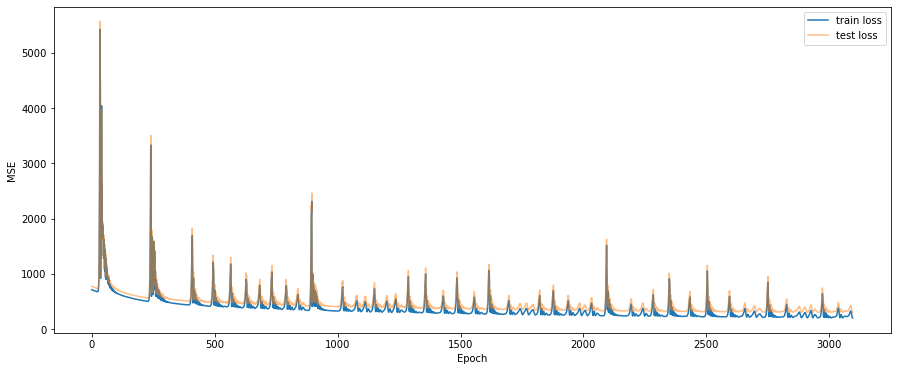

In [135]:
plt.figure(figsize=(15, 6))
plt.plot(mse_history[400::], label='train loss', alpha = 1)
plt.plot(mse_history_test[400::], label='test loss', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

Если посмотреть на график, то можно увидеть, что несмотря на то, что ошибка на тестовой выборке всегда была больше чем на тренировочной, не возникало такой ситуации, что ошибка на тренировочной выборке падала, а на тестовой увеличивалась. Следовательно модель не переобучилась.

Подсчет основных метрик для тестового датасета в сравнении с предсказанными значениями

In [136]:
# Считаем метрики
# Количество эпох
print("Эпох:", epoch)

# Тестовые значения исследуемого признака 
test_labels = torch.tensor(y_test.values.reshape(-1,1)).float()

# Подсчет средней квадротичной ошибки
mse = criterion(predicted_labels, torch.tensor(y_test.values.reshape(-1,1)).float()).item()
print("MSE:", mse)

# Подсчет коэффициента детерминации
r2 = r2_score(test_labels.detach().numpy(), predicted_labels.detach().numpy())
print("R^2:", r2)

# Подсчет средней квадротичной ошибки
mae = mean_absolute_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy())
print("MAE:", mae)

# подсчитываем квадратный корень из MSE
rmse = math.sqrt(mean_squared_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy()))
print("RMSE:", rmse)

Эпох: 3496
MSE: 304.8677062988281
R^2: 0.9932057710324069
MAE: 12.602969
RMSE: 17.46046210202944


Визуализация изменения ошибки для тестовой выборки

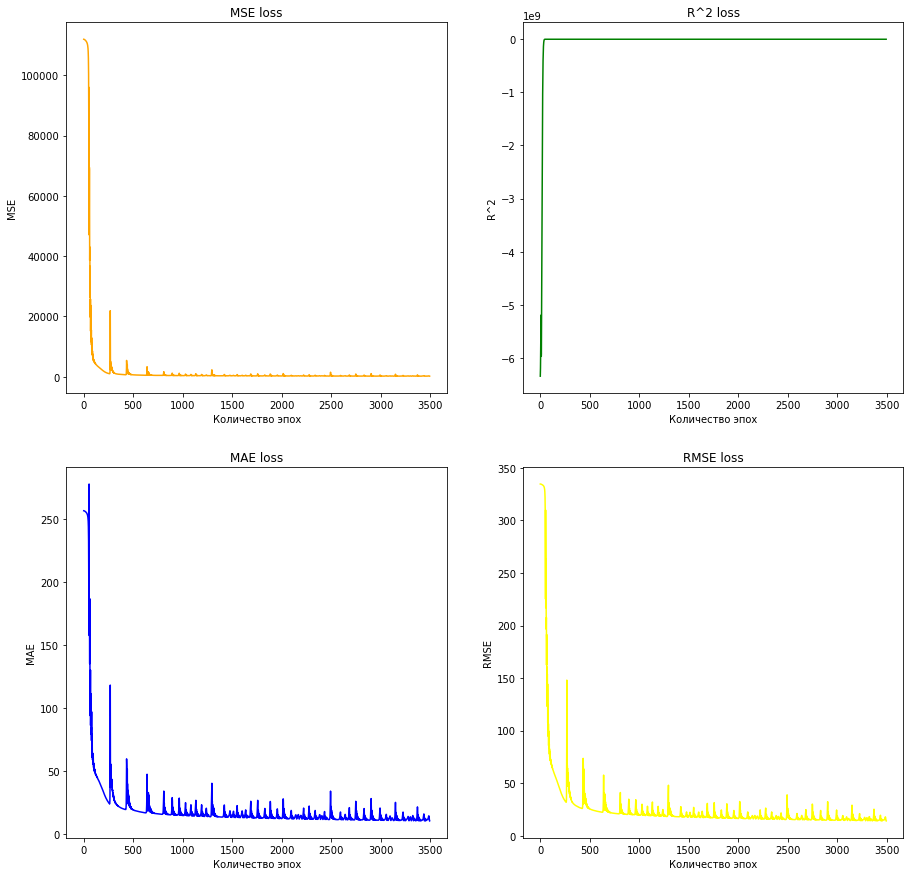

In [137]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Первый график
axs[0, 0].plot([i for i in range(len(mse_history))], mse_history, color = 'orange')
axs[0, 0].set_title('MSE loss')
axs[0, 0].set_xlabel('Количество эпох')
axs[0, 0].set_ylabel('MSE')

# Второй график
axs[0, 1].plot([i for i in range(len(r2_history))], r2_history, color = 'green')
axs[0, 1].set_title('R^2 loss')
axs[0, 1].set_xlabel('Количество эпох')
axs[0, 1].set_ylabel('R^2')

# Третий график
axs[1, 0].plot([i for i in range(len(mae_history))], mae_history, color = 'blue')
axs[1, 0].set_title('MAE loss')
axs[1, 0].set_xlabel('Количество эпох')
axs[1, 0].set_ylabel('MAE')

# Четвертый график
axs[1, 1].plot([i for i in range(len(rmse_history))], rmse_history, color = 'yellow')
axs[1, 1].set_title('RMSE loss')
axs[1, 1].set_xlabel('Количество эпох')
axs[1, 1].set_ylabel('RMSE')

plt.show()

Для визуализации разницы между предсказанными и действительными значениями можно построить scatter plot, в котором на оси x будут действительные значения, а на оси y - предсказанные. Разница между ними будет видна как расстояние точки от диагонали.

Для удобства восприятия возьмем не все значения, а лишь срез, чтобы увидеть более подробно

In [146]:
num_of_items = 150
true_values = torch.tensor(y_test.values.reshape(-1,1)).detach().numpy()[:num_of_items:]
pred_values = predicted_labels.detach().numpy()[:num_of_items:]

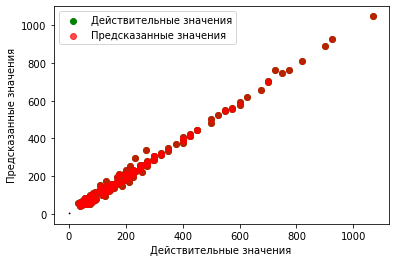

In [147]:
plt.scatter(true_values,pred_values, c='g', label='Действительные значения',  alpha=1)
plt.scatter(true_values, pred_values, c='r', label='Предсказанные значения',  alpha=0.7)
plt.plot([0, 5], [0, 5], 'k--')
plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Также можно построить график, на котором будут одновременно отражены предсказанные и реальные значения

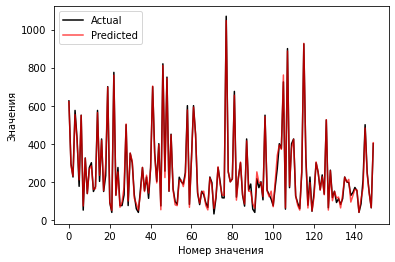

In [148]:
plt.plot(true_values, label='Actual', alpha = 1, color = 'black')
plt.plot(pred_values, label='Predicted',  alpha = 0.7, color='red')
plt.legend()
plt.xlabel('Номер значения')
plt.ylabel('Значения')
plt.show()

Максимальная разница между предсказанным значением и реальным

In [142]:
# Вычисляем процент максимального расхождения
diff = np.abs(pred_values - true_values)
max_diff_percent = 100 * np.max(diff) / np.max(np.abs(pred_values - np.mean(pred_values)))
print("Максимальное расхождение:", round(max_diff_percent,2), "%")

Максимальное расхождение: 9.63 %


In [143]:
pred_values

array([[620.5215 ],
       [285.8626 ],
       [229.94464],
       ...,
       [246.51382],
       [ 39.19114],
       [188.31863]], dtype=float32)

In [144]:
true_values

array([[625],
       [295],
       [225],
       ...,
       [250],
       [ 53],
       [188]])

#### CNN модель

In [149]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 32 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [157]:
# Создаем экземпляр сети и определяем функцию потерь и оптимизатор
net = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=30, verbose=True)

# Обучаем сеть
mse_history_cnn = []
r2_history_cnn = []
mae_history_cnn = []
rmse_history_cnn = []
mse_history_cnn_test = []

inputs_train = torch.tensor(X_train.values).float()
labels_train = torch.tensor(y_train.values.reshape(-1,1)).float()

inputs_test = torch.tensor(X_test.values).float()
labels_test = torch.tensor(y_test.values.reshape(-1,1)).float()
MSE_LOSS = 1000000000
epoch = 0
while MSE_LOSS > 200:
    optimizer.zero_grad()
    
    outputs = net(inputs_train)
    outputs_test = net(inputs_test)
    
    loss_train = criterion(outputs, labels_train)
    loss_test = criterion(outputs_test, labels_test)
    
    MSE_LOSS = loss_train.item()
    MSE_LOSS_TEST = loss_test.item()
    
    mse_history_cnn.append(MSE_LOSS)
    mse_history_cnn_test.append(MSE_LOSS_TEST)
    
    loss_train.backward()
    optimizer.step()
    scheduler.step(loss_train)
    print('Epoch %d: loss=%.3f' % (epoch+1, loss_train.item()))
    epoch += 1
    r2_history_cnn.append(r2_score(outputs.detach().numpy(),labels_train.detach().numpy()))
    mae_history_cnn.append(mean_absolute_error(outputs.detach().numpy(),labels_train.detach().numpy()))
    rmse_history_cnn.append(math.sqrt(mean_squared_error(outputs.detach().numpy(),labels_train.detach().numpy())))
print("Complete!")

# Предсказываем значения для тестовой выборки
test_inputs = torch.tensor(X_test.values).float() # тестовые значения без целевого признака
predicted_labels = net(test_inputs) # предсказанные значения целевого признака

# Предсказываем значения для тренировочной выборки
predicted_labels_train = net(inputs_train)

Epoch 1: loss=111884.297
Epoch 2: loss=111795.188
Epoch 3: loss=111632.383
Epoch 4: loss=111297.742
Epoch 5: loss=110672.648
Epoch 6: loss=109601.734
Epoch 7: loss=107882.352
Epoch 8: loss=105257.906
Epoch 9: loss=101421.289
Epoch 10: loss=96045.336
Epoch 11: loss=88837.430
Epoch 12: loss=79669.961
Epoch 13: loss=68847.773
Epoch 14: loss=57582.371
Epoch 15: loss=49089.258
Epoch 16: loss=49744.512
Epoch 17: loss=60470.133
Epoch 18: loss=63158.609
Epoch 19: loss=57562.238
Epoch 20: loss=51144.285
Epoch 21: loss=47843.602
Epoch 22: loss=47804.195
Epoch 23: loss=49500.324
Epoch 24: loss=51468.871
Epoch 25: loss=52866.527
Epoch 26: loss=53365.039
Epoch 27: loss=52945.742
Epoch 28: loss=51773.504
Epoch 29: loss=50149.402
Epoch 30: loss=48491.723
Epoch 31: loss=47286.555
Epoch 32: loss=46941.109
Epoch 33: loss=47525.508
Epoch 34: loss=48562.410
Epoch 35: loss=49229.438
Epoch 36: loss=49014.656
Epoch 37: loss=48118.367
Epoch 38: loss=47155.047
Epoch 39: loss=46607.730
Epoch 40: loss=46576.824


Epoch 327: loss=2117.492
Epoch 328: loss=2108.474
Epoch 329: loss=2077.702
Epoch 330: loss=2058.217
Epoch 331: loss=2063.449
Epoch 332: loss=2070.104
Epoch 333: loss=2054.805
Epoch 334: loss=2032.289
Epoch 335: loss=2019.778
Epoch 336: loss=2020.532
Epoch 337: loss=2022.084
Epoch 338: loss=2012.205
Epoch 339: loss=1996.290
Epoch 340: loss=1981.971
Epoch 341: loss=1974.917
Epoch 342: loss=1972.847
Epoch 343: loss=1970.128
Epoch 344: loss=1963.969
Epoch 345: loss=1952.948
Epoch 346: loss=1940.964
Epoch 347: loss=1929.909
Epoch 348: loss=1921.179
Epoch 349: loss=1914.647
Epoch 350: loss=1909.438
Epoch 351: loss=1904.857
Epoch 352: loss=1900.309
Epoch 353: loss=1896.427
Epoch 354: loss=1892.227
Epoch 355: loss=1890.481
Epoch 356: loss=1889.531
Epoch 357: loss=1895.347
Epoch 358: loss=1903.842
Epoch 359: loss=1930.397
Epoch 360: loss=1957.970
Epoch 361: loss=2023.516
Epoch 362: loss=2045.135
Epoch 363: loss=2091.168
Epoch 364: loss=1993.276
Epoch 365: loss=1897.549
Epoch 366: loss=1806.842


Epoch 655: loss=1138.057
Epoch 656: loss=1139.169
Epoch 657: loss=1152.498
Epoch 658: loss=1129.460
Epoch 659: loss=1114.501
Epoch 660: loss=1079.387
Epoch 661: loss=1053.537
Epoch 662: loss=1034.562
Epoch 663: loss=1028.309
Epoch 664: loss=1032.624
Epoch 665: loss=1043.239
Epoch 666: loss=1058.889
Epoch 667: loss=1071.655
Epoch 668: loss=1091.802
Epoch 669: loss=1100.155
Epoch 670: loss=1120.795
Epoch 671: loss=1116.985
Epoch 672: loss=1125.203
Epoch 673: loss=1102.523
Epoch 674: loss=1087.603
Epoch 675: loss=1057.204
Epoch 676: loss=1035.247
Epoch 677: loss=1019.113
Epoch 678: loss=1012.983
Epoch 679: loss=1015.223
Epoch 680: loss=1023.147
Epoch 681: loss=1036.066
Epoch 682: loss=1048.998
Epoch 683: loss=1070.265
Epoch 684: loss=1084.215
Epoch 685: loss=1113.662
Epoch 686: loss=1119.657
Epoch 687: loss=1144.451
Epoch 688: loss=1125.078
Epoch 689: loss=1117.082
Epoch 690: loss=1074.415
Epoch 691: loss=1043.015
Epoch 692: loss=1014.065
Epoch 693: loss=1000.564
Epoch 694: loss=1001.183


Epoch 991: loss=836.857
Epoch 992: loss=821.824
Epoch 993: loss=816.732
Epoch 994: loss=821.205
Epoch 995: loss=830.121
Epoch 996: loss=839.308
Epoch 997: loss=841.888
Epoch 998: loss=841.174
Epoch 999: loss=832.936
Epoch 1000: loss=824.465
Epoch 1001: loss=816.746
Epoch 1002: loss=812.642
Epoch 1003: loss=811.930
Epoch 1004: loss=813.785
Epoch 1005: loss=817.179
Epoch 1006: loss=820.527
Epoch 1007: loss=823.875
Epoch 1008: loss=825.695
Epoch 1009: loss=827.929
Epoch 1010: loss=828.321
Epoch 1011: loss=829.921
Epoch 1012: loss=829.801
Epoch 1013: loss=831.685
Epoch 1014: loss=831.204
Epoch 1015: loss=833.157
Epoch 1016: loss=832.516
Epoch 1017: loss=835.307
Epoch 1018: loss=835.526
Epoch 1019: loss=840.427
Epoch 1020: loss=842.360
Epoch 1021: loss=851.245
Epoch 1022: loss=856.470
Epoch 1023: loss=873.142
Epoch 1024: loss=882.863
Epoch 1025: loss=912.180
Epoch 1026: loss=922.810
Epoch 1027: loss=961.859
Epoch 1028: loss=957.162
Epoch 1029: loss=981.706
Epoch 1030: loss=944.171
Epoch 103

Epoch 1318: loss=710.822
Epoch 1319: loss=710.535
Epoch 1320: loss=710.250
Epoch 1321: loss=709.965
Epoch 1322: loss=709.680
Epoch 1323: loss=709.395
Epoch 1324: loss=709.109
Epoch 1325: loss=708.823
Epoch 1326: loss=708.538
Epoch 1327: loss=708.254
Epoch 1328: loss=707.969
Epoch 1329: loss=707.686
Epoch 1330: loss=707.400
Epoch 1331: loss=707.117
Epoch 1332: loss=706.834
Epoch 1333: loss=706.551
Epoch 1334: loss=706.268
Epoch 1335: loss=705.986
Epoch 1336: loss=705.704
Epoch 1337: loss=705.421
Epoch 1338: loss=705.138
Epoch 1339: loss=704.856
Epoch 1340: loss=704.574
Epoch 1341: loss=704.292
Epoch 1342: loss=704.013
Epoch 1343: loss=703.732
Epoch 1344: loss=703.452
Epoch 1345: loss=703.170
Epoch 1346: loss=702.887
Epoch 1347: loss=702.603
Epoch 1348: loss=702.319
Epoch 1349: loss=702.034
Epoch 1350: loss=701.748
Epoch 1351: loss=701.462
Epoch 1352: loss=701.177
Epoch 1353: loss=700.894
Epoch 1354: loss=700.611
Epoch 1355: loss=700.328
Epoch 1356: loss=700.046
Epoch 1357: loss=699.766


Epoch 1646: loss=621.703
Epoch 1647: loss=619.403
Epoch 1648: loss=617.724
Epoch 1649: loss=616.926
Epoch 1650: loss=617.030
Epoch 1651: loss=617.633
Epoch 1652: loss=618.098
Epoch 1653: loss=618.244
Epoch 1654: loss=617.922
Epoch 1655: loss=617.316
Epoch 1656: loss=616.451
Epoch 1657: loss=615.512
Epoch 1658: loss=614.673
Epoch 1659: loss=614.102
Epoch 1660: loss=613.827
Epoch 1661: loss=613.755
Epoch 1662: loss=613.776
Epoch 1663: loss=613.850
Epoch 1664: loss=613.942
Epoch 1665: loss=614.007
Epoch 1666: loss=614.129
Epoch 1667: loss=614.280
Epoch 1668: loss=614.552
Epoch 1669: loss=614.860
Epoch 1670: loss=615.526
Epoch 1671: loss=616.108
Epoch 1672: loss=617.243
Epoch 1673: loss=618.308
Epoch 1674: loss=620.360
Epoch 1675: loss=621.996
Epoch 1676: loss=624.608
Epoch 1677: loss=626.280
Epoch 1678: loss=628.306
Epoch 1679: loss=628.032
Epoch 1680: loss=627.420
Epoch 1681: loss=624.343
Epoch 1682: loss=621.296
Epoch 1683: loss=617.282
Epoch 1684: loss=613.879
Epoch 1685: loss=610.954


Epoch 1972: loss=561.621
Epoch 1973: loss=561.513
Epoch 1974: loss=561.406
Epoch 1975: loss=561.296
Epoch 1976: loss=561.188
Epoch 1977: loss=561.079
Epoch 1978: loss=560.972
Epoch 1979: loss=560.863
Epoch 1980: loss=560.754
Epoch 1981: loss=560.648
Epoch 1982: loss=560.540
Epoch 1983: loss=560.434
Epoch 1984: loss=560.326
Epoch 1985: loss=560.220
Epoch 1986: loss=560.112
Epoch 1987: loss=560.007
Epoch 1988: loss=559.898
Epoch 1989: loss=559.793
Epoch 1990: loss=559.688
Epoch 1991: loss=559.579
Epoch 1992: loss=559.474
Epoch 1993: loss=559.369
Epoch 1994: loss=559.262
Epoch 1995: loss=559.154
Epoch 1996: loss=559.051
Epoch 1997: loss=558.946
Epoch 1998: loss=558.838
Epoch 1999: loss=558.735
Epoch 2000: loss=558.627
Epoch 2001: loss=558.521
Epoch 2002: loss=558.418
Epoch 2003: loss=558.311
Epoch 2004: loss=558.204
Epoch 2005: loss=558.098
Epoch 2006: loss=557.993
Epoch 2007: loss=557.888
Epoch 2008: loss=557.784
Epoch 2009: loss=557.679
Epoch 2010: loss=557.574
Epoch 2011: loss=557.469


Epoch 2301: loss=527.124
Epoch 2302: loss=527.015
Epoch 2303: loss=526.901
Epoch 2304: loss=526.791
Epoch 2305: loss=526.685
Epoch 2306: loss=526.585
Epoch 2307: loss=526.486
Epoch 2308: loss=526.376
Epoch 2309: loss=526.261
Epoch 2310: loss=526.145
Epoch 2311: loss=526.040
Epoch 2312: loss=525.933
Epoch 2313: loss=525.823
Epoch 2314: loss=525.716
Epoch 2315: loss=525.608
Epoch 2316: loss=525.500
Epoch 2317: loss=525.396
Epoch 2318: loss=525.288
Epoch 2319: loss=525.185
Epoch 2320: loss=525.082
Epoch 2321: loss=524.974
Epoch 2322: loss=524.858
Epoch 2323: loss=524.754
Epoch 2324: loss=524.653
Epoch 2325: loss=524.544
Epoch 2326: loss=524.441
Epoch 2327: loss=524.335
Epoch 2328: loss=524.224
Epoch 2329: loss=524.124
Epoch 2330: loss=524.028
Epoch 2331: loss=523.924
Epoch 2332: loss=523.820
Epoch 2333: loss=523.712
Epoch 2334: loss=523.600
Epoch 2335: loss=523.500
Epoch 2336: loss=523.412
Epoch 2337: loss=523.308
Epoch 2338: loss=523.201
Epoch 2339: loss=523.086
Epoch 2340: loss=522.978


Epoch 2629: loss=498.957
Epoch 2630: loss=500.666
Epoch 2631: loss=502.769
Epoch 2632: loss=504.685
Epoch 2633: loss=506.355
Epoch 2634: loss=507.287
Epoch 2635: loss=507.468
Epoch 2636: loss=506.062
Epoch 2637: loss=503.877
Epoch 2638: loss=500.767
Epoch 2639: loss=497.887
Epoch 2640: loss=495.410
Epoch 2641: loss=493.851
Epoch 2642: loss=493.353
Epoch 2643: loss=493.702
Epoch 2644: loss=494.551
Epoch 2645: loss=495.635
Epoch 2646: loss=496.787
Epoch 2647: loss=497.771
Epoch 2648: loss=498.879
Epoch 2649: loss=499.256
Epoch 2650: loss=499.313
Epoch 2651: loss=498.354
Epoch 2652: loss=497.351
Epoch 2653: loss=495.948
Epoch 2654: loss=494.709
Epoch 2655: loss=493.498
Epoch 2656: loss=492.583
Epoch 2657: loss=492.049
Epoch 2658: loss=491.880
Epoch 2659: loss=491.977
Epoch 2660: loss=492.224
Epoch 2661: loss=492.617
Epoch 2662: loss=492.964
Epoch 2663: loss=493.432
Epoch 2664: loss=493.821
Epoch 2665: loss=494.263
Epoch 2666: loss=494.665
Epoch 2667: loss=495.424
Epoch 2668: loss=496.050


Epoch 2957: loss=470.976
Epoch 2958: loss=470.298
Epoch 2959: loss=469.267
Epoch 2960: loss=468.214
Epoch 2961: loss=467.475
Epoch 2962: loss=467.053
Epoch 2963: loss=466.917
Epoch 2964: loss=466.974
Epoch 2965: loss=467.126
Epoch 2966: loss=467.313
Epoch 2967: loss=467.524
Epoch 2968: loss=467.726
Epoch 2969: loss=467.842
Epoch 2970: loss=467.990
Epoch 2971: loss=468.153
Epoch 2972: loss=468.259
Epoch 2973: loss=468.461
Epoch 2974: loss=468.662
Epoch 2975: loss=468.986
Epoch 2976: loss=469.364
Epoch 2977: loss=469.774
Epoch 2978: loss=470.135
Epoch 2979: loss=470.496
Epoch 2980: loss=470.803
Epoch 2981: loss=470.847
Epoch 2982: loss=470.837
Epoch 2983: loss=470.615
Epoch 2984: loss=470.288
Epoch 2985: loss=469.823
Epoch 2986: loss=469.308
Epoch 2987: loss=468.592
Epoch 2988: loss=468.017
Epoch 2989: loss=467.427
Epoch 2990: loss=466.844
Epoch 2991: loss=466.185
Epoch 2992: loss=465.624
Epoch 2993: loss=465.141
Epoch 2994: loss=464.745
Epoch 2995: loss=464.501
Epoch 2996: loss=464.332


Epoch 3285: loss=445.316
Epoch 3286: loss=446.591
Epoch 3287: loss=447.963
Epoch 3288: loss=449.609
Epoch 3289: loss=451.256
Epoch 3290: loss=452.969
Epoch 3291: loss=454.467
Epoch 3292: loss=455.516
Epoch 3293: loss=456.087
Epoch 3294: loss=455.946
Epoch 3295: loss=454.795
Epoch 3296: loss=452.861
Epoch 3297: loss=450.522
Epoch 3298: loss=448.175
Epoch 3299: loss=445.997
Epoch 3300: loss=444.332
Epoch 3301: loss=443.359
Epoch 3302: loss=442.930
Epoch 3303: loss=442.956
Epoch 3304: loss=443.420
Epoch 3305: loss=444.311
Epoch 3306: loss=445.508
Epoch 3307: loss=447.126
Epoch 3308: loss=449.068
Epoch 3309: loss=451.296
Epoch 3310: loss=453.407
Epoch 3311: loss=455.263
Epoch 3312: loss=456.440
Epoch 3313: loss=456.637
Epoch 3314: loss=455.437
Epoch 3315: loss=453.371
Epoch 3316: loss=450.643
Epoch 3317: loss=447.678
Epoch 3318: loss=444.987
Epoch 3319: loss=443.071
Epoch 3320: loss=442.029
Epoch 3321: loss=441.694
Epoch 3322: loss=441.888
Epoch 3323: loss=442.542
Epoch 3324: loss=443.723


Epoch 3613: loss=431.077
Epoch 3614: loss=430.195
Epoch 3615: loss=428.680
Epoch 3616: loss=427.320
Epoch 3617: loss=425.902
Epoch 3618: loss=424.750
Epoch 3619: loss=423.759
Epoch 3620: loss=423.082
Epoch 3621: loss=422.666
Epoch 3622: loss=422.568
Epoch 3623: loss=422.728
Epoch 3624: loss=423.084
Epoch 3625: loss=423.719
Epoch 3626: loss=424.446
Epoch 3627: loss=425.595
Epoch 3628: loss=426.969
Epoch 3629: loss=428.962
Epoch 3630: loss=431.169
Epoch 3631: loss=434.473
Epoch 3632: loss=438.305
Epoch 3633: loss=442.923
Epoch 3634: loss=447.373
Epoch 3635: loss=450.527
Epoch 3636: loss=452.149
Epoch 3637: loss=450.296
Epoch 3638: loss=445.953
Epoch 3639: loss=439.490
Epoch 3640: loss=432.314
Epoch 3641: loss=426.372
Epoch 3642: loss=422.428
Epoch 3643: loss=421.458
Epoch 3644: loss=423.071
Epoch 3645: loss=425.999
Epoch 3646: loss=429.686
Epoch 3647: loss=432.503
Epoch 3648: loss=434.413
Epoch 3649: loss=434.174
Epoch 3650: loss=432.436
Epoch 3651: loss=429.050
Epoch 3652: loss=425.613


Epoch 3941: loss=406.842
Epoch 3942: loss=405.228
Epoch 3943: loss=404.893
Epoch 3944: loss=405.556
Epoch 3945: loss=406.959
Epoch 3946: loss=408.855
Epoch 3947: loss=410.925
Epoch 3948: loss=412.964
Epoch 3949: loss=414.544
Epoch 3950: loss=415.856
Epoch 3951: loss=415.926
Epoch 3952: loss=415.374
Epoch 3953: loss=413.764
Epoch 3954: loss=411.784
Epoch 3955: loss=409.180
Epoch 3956: loss=407.073
Epoch 3957: loss=405.426
Epoch 3958: loss=404.543
Epoch 3959: loss=404.079
Epoch 3960: loss=404.044
Epoch 3961: loss=404.350
Epoch 3962: loss=404.920
Epoch 3963: loss=405.877
Epoch 3964: loss=407.068
Epoch 3965: loss=408.670
Epoch 3966: loss=410.182
Epoch 3967: loss=411.779
Epoch 3968: loss=412.955
Epoch 3969: loss=414.050
Epoch 3970: loss=414.476
Epoch 3971: loss=414.887
Epoch 3972: loss=414.350
Epoch 3973: loss=413.232
Epoch 3974: loss=411.102
Epoch 3975: loss=409.025
Epoch 3976: loss=406.895
Epoch 3977: loss=405.208
Epoch 3978: loss=404.113
Epoch 3979: loss=403.505
Epoch 3980: loss=403.101


Epoch 4269: loss=406.446
Epoch 4270: loss=406.110
Epoch 4271: loss=404.611
Epoch 4272: loss=401.814
Epoch 4273: loss=398.265
Epoch 4274: loss=394.713
Epoch 4275: loss=391.645
Epoch 4276: loss=389.716
Epoch 4277: loss=388.828
Epoch 4278: loss=388.895
Epoch 4279: loss=389.689
Epoch 4280: loss=390.922
Epoch 4281: loss=392.726
Epoch 4282: loss=394.446
Epoch 4283: loss=396.116
Epoch 4284: loss=397.137
Epoch 4285: loss=397.585
Epoch 4286: loss=397.315
Epoch 4287: loss=396.743
Epoch 4288: loss=395.624
Epoch 4289: loss=394.301
Epoch 4290: loss=392.599
Epoch 4291: loss=391.266
Epoch 4292: loss=389.907
Epoch 4293: loss=388.876
Epoch 4294: loss=388.230
Epoch 4295: loss=387.936
Epoch 4296: loss=387.846
Epoch 4297: loss=387.891
Epoch 4298: loss=388.073
Epoch 4299: loss=388.380
Epoch 4300: loss=388.982
Epoch 4301: loss=389.803
Epoch 4302: loss=391.207
Epoch 4303: loss=393.182
Epoch 4304: loss=395.393
Epoch 4305: loss=397.861
Epoch 4306: loss=400.349
Epoch 4307: loss=403.171
Epoch 4308: loss=405.421


Epoch 4598: loss=389.843
Epoch 4599: loss=385.909
Epoch 4600: loss=381.637
Epoch 4601: loss=377.997
Epoch 4602: loss=375.862
Epoch 4603: loss=374.596
Epoch 4604: loss=374.265
Epoch 4605: loss=374.622
Epoch 4606: loss=375.452
Epoch 4607: loss=377.003
Epoch 4608: loss=378.665
Epoch 4609: loss=380.784
Epoch 4610: loss=383.451
Epoch 4611: loss=385.878
Epoch 4612: loss=388.063
Epoch 4613: loss=389.314
Epoch 4614: loss=389.766
Epoch 4615: loss=388.803
Epoch 4616: loss=387.343
Epoch 4617: loss=384.761
Epoch 4618: loss=381.812
Epoch 4619: loss=379.114
Epoch 4620: loss=376.648
Epoch 4621: loss=375.150
Epoch 4622: loss=373.993
Epoch 4623: loss=373.497
Epoch 4624: loss=373.454
Epoch 4625: loss=373.747
Epoch 4626: loss=374.357
Epoch 4627: loss=375.143
Epoch 4628: loss=376.654
Epoch 4629: loss=378.463
Epoch 4630: loss=380.606
Epoch 4631: loss=383.155
Epoch 4632: loss=385.515
Epoch 4633: loss=387.818
Epoch 4634: loss=389.171
Epoch 4635: loss=389.844
Epoch 4636: loss=389.081
Epoch 4637: loss=387.757


Epoch 4926: loss=376.884
Epoch 4927: loss=373.364
Epoch 4928: loss=369.766
Epoch 4929: loss=366.404
Epoch 4930: loss=363.858
Epoch 4931: loss=362.051
Epoch 4932: loss=361.117
Epoch 4933: loss=360.872
Epoch 4934: loss=361.189
Epoch 4935: loss=362.100
Epoch 4936: loss=363.570
Epoch 4937: loss=365.773
Epoch 4938: loss=367.993
Epoch 4939: loss=370.629
Epoch 4940: loss=373.021
Epoch 4941: loss=375.467
Epoch 4942: loss=377.210
Epoch 4943: loss=377.622
Epoch 4944: loss=376.255
Epoch 4945: loss=374.067
Epoch 4946: loss=370.757
Epoch 4947: loss=367.425
Epoch 4948: loss=364.278
Epoch 4949: loss=362.104
Epoch 4950: loss=360.697
Epoch 4951: loss=360.179
Epoch 4952: loss=360.354
Epoch 4953: loss=361.010
Epoch 4954: loss=362.101
Epoch 4955: loss=363.426
Epoch 4956: loss=365.327
Epoch 4957: loss=367.128
Epoch 4958: loss=369.464
Epoch 4959: loss=371.449
Epoch 4960: loss=373.578
Epoch 4961: loss=374.851
Epoch 4962: loss=375.557
Epoch 4963: loss=374.902
Epoch 4964: loss=373.483
Epoch 4965: loss=370.652


Epoch 5254: loss=359.804
Epoch 5255: loss=356.524
Epoch 5256: loss=353.409
Epoch 5257: loss=350.939
Epoch 5258: loss=349.462
Epoch 5259: loss=348.903
Epoch 5260: loss=349.033
Epoch 5261: loss=349.642
Epoch 5262: loss=350.641
Epoch 5263: loss=352.001
Epoch 5264: loss=353.517
Epoch 5265: loss=355.400
Epoch 5266: loss=357.310
Epoch 5267: loss=359.428
Epoch 5268: loss=361.299
Epoch 5269: loss=362.917
Epoch 5270: loss=363.798
Epoch 5271: loss=364.250
Epoch 5272: loss=363.539
Epoch 5273: loss=362.327
Epoch 5274: loss=360.070
Epoch 5275: loss=357.291
Epoch 5276: loss=354.316
Epoch 5277: loss=351.820
Epoch 5278: loss=349.856
Epoch 5279: loss=348.704
Epoch 5280: loss=348.193
Epoch 5281: loss=348.194
Epoch 5282: loss=348.515
Epoch 5283: loss=349.117
Epoch 5284: loss=350.021
Epoch 5285: loss=351.126
Epoch 5286: loss=352.465
Epoch 5287: loss=353.858
Epoch 5288: loss=355.693
Epoch 5289: loss=357.276
Epoch 5290: loss=358.834
Epoch 5291: loss=360.331
Epoch 5292: loss=361.909
Epoch 5293: loss=363.060


Epoch 5582: loss=344.966
Epoch 5583: loss=347.425
Epoch 5584: loss=349.290
Epoch 5585: loss=350.910
Epoch 5586: loss=351.964
Epoch 5587: loss=352.194
Epoch 5588: loss=351.547
Epoch 5589: loss=350.032
Epoch 5590: loss=348.053
Epoch 5591: loss=345.538
Epoch 5592: loss=343.014
Epoch 5593: loss=340.936
Epoch 5594: loss=339.506
Epoch 5595: loss=338.591
Epoch 5596: loss=338.042
Epoch 5597: loss=337.772
Epoch 5598: loss=337.738
Epoch 5599: loss=337.830
Epoch 5600: loss=337.947
Epoch 5601: loss=338.226
Epoch 5602: loss=338.670
Epoch 5603: loss=339.417
Epoch 5604: loss=340.474
Epoch 5605: loss=342.144
Epoch 5606: loss=344.315
Epoch 5607: loss=346.744
Epoch 5608: loss=349.524
Epoch 5609: loss=352.856
Epoch 5610: loss=356.120
Epoch 5611: loss=358.605
Epoch 5612: loss=359.667
Epoch 5613: loss=359.182
Epoch 5614: loss=356.967
Epoch 5615: loss=353.707
Epoch 5616: loss=349.772
Epoch 5617: loss=346.013
Epoch 5618: loss=342.558
Epoch 5619: loss=339.926
Epoch 5620: loss=338.101
Epoch 5621: loss=337.259


Epoch 5908: loss=328.263
Epoch 5909: loss=330.554
Epoch 5910: loss=328.247
Epoch 5911: loss=330.015
Epoch 5912: loss=328.238
Epoch 5913: loss=329.513
Epoch 5914: loss=328.224
Epoch 5915: loss=329.138
Epoch 5916: loss=328.180
Epoch 5917: loss=328.858
Epoch 5918: loss=328.150
Epoch 5919: loss=328.641
Epoch 5920: loss=328.122
Epoch 5921: loss=328.433
Epoch 5922: loss=328.076
Epoch 5923: loss=328.292
Epoch 5924: loss=328.057
Epoch 5925: loss=328.176
Epoch 5926: loss=328.028
Epoch 5927: loss=328.072
Epoch 5928: loss=327.988
Epoch 5929: loss=327.986
Epoch 5930: loss=327.946
Epoch 5931: loss=327.915
Epoch 5932: loss=327.902
Epoch 5933: loss=327.856
Epoch 5934: loss=327.854
Epoch 5935: loss=327.794
Epoch 5936: loss=327.822
Epoch 5937: loss=327.744
Epoch 5938: loss=327.783
Epoch 5939: loss=327.695
Epoch 5940: loss=327.732
Epoch 5941: loss=327.655
Epoch 5942: loss=327.679
Epoch 5943: loss=327.618
Epoch 5944: loss=327.637
Epoch 5945: loss=327.581
Epoch 5946: loss=327.600
Epoch 5947: loss=327.548


Epoch 6236: loss=322.832
Epoch 6237: loss=322.814
Epoch 6238: loss=322.791
Epoch 6239: loss=322.785
Epoch 6240: loss=322.778
Epoch 6241: loss=322.751
Epoch 6242: loss=322.726
Epoch 6243: loss=322.707
Epoch 6244: loss=322.689
Epoch 6245: loss=322.670
Epoch 6246: loss=322.656
Epoch 6247: loss=322.643
Epoch 6248: loss=322.631
Epoch 6249: loss=322.611
Epoch 6250: loss=322.588
Epoch 6251: loss=322.568
Epoch 6252: loss=322.551
Epoch 6253: loss=322.542
Epoch 6254: loss=322.550
Epoch 6255: loss=322.521
Epoch 6256: loss=322.489
Epoch 6257: loss=322.468
Epoch 6258: loss=322.455
Epoch 6259: loss=322.447
Epoch 6260: loss=322.435
Epoch 6261: loss=322.414
Epoch 6262: loss=322.382
Epoch 6263: loss=322.364
Epoch 6264: loss=322.352
Epoch 6265: loss=322.343
Epoch 6266: loss=322.330
Epoch 6267: loss=322.299
Epoch 6268: loss=322.279
Epoch 6269: loss=322.263
Epoch 6270: loss=322.246
Epoch 6271: loss=322.238
Epoch 6272: loss=322.219
Epoch 6273: loss=322.196
Epoch 6274: loss=322.179
Epoch 6275: loss=322.158


Epoch 6564: loss=317.144
Epoch 6565: loss=317.145
Epoch 6566: loss=317.128
Epoch 6567: loss=317.107
Epoch 6568: loss=317.076
Epoch 6569: loss=317.043
Epoch 6570: loss=317.013
Epoch 6571: loss=316.999
Epoch 6572: loss=316.986
Epoch 6573: loss=316.968
Epoch 6574: loss=316.963
Epoch 6575: loss=316.938
Epoch 6576: loss=316.919
Epoch 6577: loss=316.893
Epoch 6578: loss=316.868
Epoch 6579: loss=316.854
Epoch 6580: loss=316.843
Epoch 6581: loss=316.844
Epoch 6582: loss=316.844
Epoch 6583: loss=316.845
Epoch 6584: loss=316.813
Epoch 6585: loss=316.769
Epoch 6586: loss=316.735
Epoch 6587: loss=316.707
Epoch 6588: loss=316.690
Epoch 6589: loss=316.672
Epoch 6590: loss=316.665
Epoch 6591: loss=316.660
Epoch 6592: loss=316.661
Epoch 6593: loss=316.663
Epoch 6594: loss=316.644
Epoch 6595: loss=316.606
Epoch 6596: loss=316.560
Epoch 6597: loss=316.527
Epoch 6598: loss=316.521
Epoch 6599: loss=316.560
Epoch 6600: loss=316.560
Epoch 6601: loss=316.551
Epoch 6602: loss=316.488
Epoch 6603: loss=316.437


Epoch 6892: loss=311.192
Epoch 6893: loss=311.136
Epoch 6894: loss=311.126
Epoch 6895: loss=311.139
Epoch 6896: loss=311.147
Epoch 6897: loss=311.142
Epoch 6898: loss=311.127
Epoch 6899: loss=311.168
Epoch 6900: loss=311.177
Epoch 6901: loss=311.163
Epoch 6902: loss=311.112
Epoch 6903: loss=311.048
Epoch 6904: loss=310.971
Epoch 6905: loss=310.917
Epoch 6906: loss=310.902
Epoch 6907: loss=310.904
Epoch 6908: loss=310.918
Epoch 6909: loss=310.981
Epoch 6910: loss=311.175
Epoch 6911: loss=311.360
Epoch 6912: loss=311.652
Epoch 6913: loss=311.788
Epoch 6914: loss=311.753
Epoch 6915: loss=311.483
Epoch 6916: loss=311.152
Epoch 6917: loss=310.853
Epoch 6918: loss=310.690
Epoch 6919: loss=310.690
Epoch 6920: loss=310.814
Epoch 6921: loss=311.081
Epoch 6922: loss=311.354
Epoch 6923: loss=311.490
Epoch 6924: loss=311.434
Epoch 6925: loss=311.278
Epoch 6926: loss=311.010
Epoch 6927: loss=310.774
Epoch 6928: loss=310.582
Epoch 6929: loss=310.480
Epoch 6930: loss=310.490
Epoch 6931: loss=310.553


KeyboardInterrupt: 

In [168]:
# Предсказываем значения для тестовой выборки
test_inputs = torch.tensor(X_test.values).float() # тестовые значения без целевого признака
predicted_labels = net(test_inputs) # предсказанные значения целевого признака

# Предсказываем значения для тренировочной выборки
predicted_labels_train = net(inputs_train)

Проверяем переобучение второй модели аналогично первой 

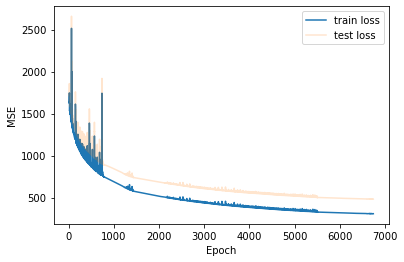

In [169]:
plt.plot(mse_history_cnn[400::], label='train loss', alpha = 1)
plt.plot(mse_history_cnn_test[400::], label='test loss', alpha = 0.2)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

Из графика видно, что модель не переобучилась

In [170]:
# Считаем метрики
# Количество эпох
print("Эпох:", epoch)

# Тестовые значения исследуемого признака 
test_labels = torch.tensor(y_test.values.reshape(-1,1)).float()

# Подсчет средней квадротичной ошибки
mse = criterion(predicted_labels, torch.tensor(y_test.values.reshape(-1,1)).float()).item()
print("MSE:", mse)

# Подсчет коэффициента детерминации
r2 = r2_score(test_labels.detach().numpy(), predicted_labels.detach().numpy())
print("R^2:", r2)

# Подсчет средней квадротичной ошибки
mae = mean_absolute_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy())
print("MAE:", mae)

# подсчитываем квадратный корень из MSE
rmse = math.sqrt(mean_squared_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy()))
print("RMSE:", rmse)

Эпох: 7142
MSE: 482.532958984375
R^2: 0.9892463546695832
MAE: 16.253399
RMSE: 21.96663354958955


Визуализация изменения ошибки для тестовой выборки

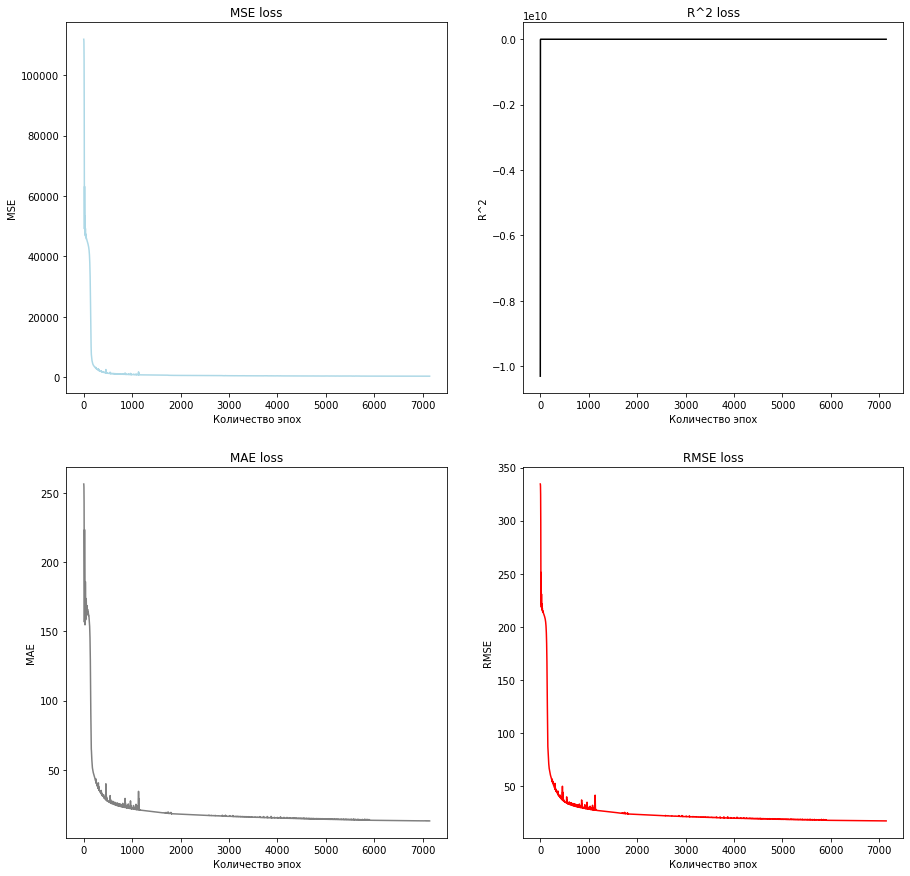

In [163]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Первый график
axs[0, 0].plot([i for i in range(len(mse_history_cnn))], mse_history_cnn, color = 'lightblue')
axs[0, 0].set_title('MSE loss')
axs[0, 0].set_xlabel('Количество эпох')
axs[0, 0].set_ylabel('MSE')

# Второй график
axs[0, 1].plot([i for i in range(len(r2_history_cnn))], r2_history_cnn, color = 'black')
axs[0, 1].set_title('R^2 loss')
axs[0, 1].set_xlabel('Количество эпох')
axs[0, 1].set_ylabel('R^2')

# Третий график
axs[1, 0].plot([i for i in range(len(mae_history_cnn))], mae_history_cnn, color = 'grey')
axs[1, 0].set_title('MAE loss')
axs[1, 0].set_xlabel('Количество эпох')
axs[1, 0].set_ylabel('MAE')

# Четвертый график
axs[1, 1].plot([i for i in range(len(rmse_history_cnn))], rmse_history_cnn, color = 'red')
axs[1, 1].set_title('RMSE loss')
axs[1, 1].set_xlabel('Количество эпох')
axs[1, 1].set_ylabel('RMSE')

plt.show()

In [171]:
num_of_items = len(predicted_labels)
true_values = torch.tensor(y_test.values.reshape(-1,1)).detach().numpy()[:num_of_items:]
pred_values = predicted_labels.detach().numpy()[:num_of_items:]

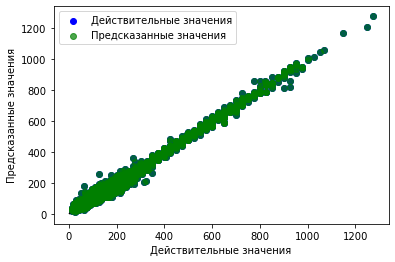

In [172]:
plt.scatter(true_values,pred_values, c='b', label='Действительные значения',  alpha=1)
plt.scatter(true_values, pred_values, c='g', label='Предсказанные значения',  alpha=0.7)
plt.plot([0, 5], [0, 5], 'k--')
plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

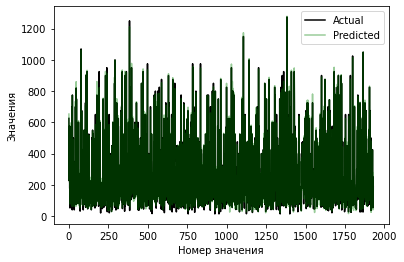

In [173]:
plt.plot(true_values, label='Actual', alpha = 1, color = 'black')
plt.plot(pred_values, label='Predicted',  alpha = 0.4, color='green')
plt.legend()
plt.xlabel('Номер значения')
plt.ylabel('Значения')
plt.show()

In [174]:
# Вычисляем процент максимального расхождения
diff = np.abs(pred_values - true_values)
max_diff_percent = 100 * np.max(diff) / np.max(np.abs(pred_values - np.mean(pred_values)))
print("Максимальное расхождение:", round(max_diff_percent,2), "%")

Максимальное расхождение: 12.98 %


#### Полносвязная модель

In [178]:
# Создаем нейронную сеть
class AnotherFullyConnected(nn.Module):
    def __init__(self):
        super(AnotherFullyConnected, self).__init__()
        self.fc1 = nn.Linear(22, 64) # 22 входных фичей, 64 скрытых нейрона
        self.fc2 = nn.Linear(64, 32) # 64 скрытых нейрона, 32 скрытых нейрона
        self.fc3 = nn.Linear(32, 1)  # 32 скрытых нейрона, 1 выход

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [180]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Создаем экземпляр сети и определяем функцию потерь и оптимизатор
net = AnotherFullyConnected()

# Критерий ошибки
criterion = nn.MSELoss()

# Создаю оптимизатор
#optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Обучаем сеть
mse_history_another = []
r2_history_another = []
mae_history_another = []
rmse_history_another = []
mse_history_another_test = []

inputs_train = torch.tensor(X_train.values).float()
labels_train = torch.tensor(y_train.values.reshape(-1,1)).float()

inputs_test= torch.tensor(X_test.values).float()
labels_test = torch.tensor(y_test.values.reshape(-1,1)).float()

# Цикл обучения модели
MSE_LOSS = 1000000000
epoch = 0
while MSE_LOSS > 200:
    optimizer.zero_grad()
    
    outputs = net(inputs_train)
    outputs_test = net(inputs_test) 
    
    loss_train = criterion(outputs, labels_train)
    loss_test = criterion(outputs_test, labels_test)
    
    MSE_LOSS = loss_train.item()
    MSE_LOSS_TEST = loss_test.item()
    
    mse_history_another.append(MSE_LOSS)
    mse_history_another_test.append(MSE_LOSS_TEST)
    
    loss_train.backward()
    optimizer.step()
    print('Epoch %d: loss=%.3f' % (epoch+1, loss_train.item()))
    epoch +=1
    r2_history_another.append(r2_score(outputs.detach().numpy(),labels_train.detach().numpy()))
    mae_history_another.append(mean_absolute_error(outputs.detach().numpy(),labels_train.detach().numpy()))
    rmse_history_another.append(math.sqrt(mean_squared_error(outputs.detach().numpy(),labels_train.detach().numpy())))
print("Complete!")

# Предсказываем значения для тестовой выборки
test_inputs = torch.tensor(X_test.values).float() # тестовые значения без целевого признака
predicted_labels = net(test_inputs) # предсказанные значения целевого признака

# Предсказываем значения для тренировочной выборки
predicted_labels_train = net(inputs_train)

Epoch 1: loss=111858.273
Epoch 2: loss=111763.102
Epoch 3: loss=111657.578
Epoch 4: loss=111509.578
Epoch 5: loss=111290.641
Epoch 6: loss=110982.047
Epoch 7: loss=110561.805
Epoch 8: loss=110006.281
Epoch 9: loss=109291.016
Epoch 10: loss=108390.352
Epoch 11: loss=107278.547
Epoch 12: loss=105930.430
Epoch 13: loss=104320.430
Epoch 14: loss=102423.758
Epoch 15: loss=100217.547
Epoch 16: loss=97682.688
Epoch 17: loss=94805.531
Epoch 18: loss=91579.438
Epoch 19: loss=88007.742
Epoch 20: loss=84107.047
Epoch 21: loss=79910.805
Epoch 22: loss=75473.969
Epoch 23: loss=70877.320
Epoch 24: loss=66232.758
Epoch 25: loss=61688.344
Epoch 26: loss=57430.305
Epoch 27: loss=53684.184
Epoch 28: loss=50702.758
Epoch 29: loss=48731.199
Epoch 30: loss=47936.203
Epoch 31: loss=48292.148
Epoch 32: loss=49476.551
Epoch 33: loss=50897.375
Epoch 34: loss=51919.805
Epoch 35: loss=52142.609
Epoch 36: loss=51504.773
Epoch 37: loss=50204.219
Epoch 38: loss=48552.434
Epoch 39: loss=46855.480
Epoch 40: loss=4534

Epoch 342: loss=3831.095
Epoch 343: loss=3825.786
Epoch 344: loss=3820.481
Epoch 345: loss=3815.184
Epoch 346: loss=3809.899
Epoch 347: loss=3804.629
Epoch 348: loss=3799.364
Epoch 349: loss=3794.114
Epoch 350: loss=3788.868
Epoch 351: loss=3783.624
Epoch 352: loss=3778.390
Epoch 353: loss=3773.153
Epoch 354: loss=3767.925
Epoch 355: loss=3762.683
Epoch 356: loss=3757.439
Epoch 357: loss=3752.195
Epoch 358: loss=3746.946
Epoch 359: loss=3741.703
Epoch 360: loss=3736.453
Epoch 361: loss=3731.208
Epoch 362: loss=3725.971
Epoch 363: loss=3720.745
Epoch 364: loss=3715.510
Epoch 365: loss=3710.281
Epoch 366: loss=3705.049
Epoch 367: loss=3699.813
Epoch 368: loss=3694.575
Epoch 369: loss=3689.344
Epoch 370: loss=3684.109
Epoch 371: loss=3678.864
Epoch 372: loss=3673.614
Epoch 373: loss=3668.361
Epoch 374: loss=3663.109
Epoch 375: loss=3657.854
Epoch 376: loss=3652.594
Epoch 377: loss=3647.337
Epoch 378: loss=3642.091
Epoch 379: loss=3636.874
Epoch 380: loss=3631.667
Epoch 381: loss=3626.464


Epoch 673: loss=2569.262
Epoch 674: loss=2566.944
Epoch 675: loss=2564.627
Epoch 676: loss=2562.320
Epoch 677: loss=2560.017
Epoch 678: loss=2557.711
Epoch 679: loss=2555.410
Epoch 680: loss=2553.107
Epoch 681: loss=2550.799
Epoch 682: loss=2548.495
Epoch 683: loss=2546.194
Epoch 684: loss=2543.898
Epoch 685: loss=2541.617
Epoch 686: loss=2539.360
Epoch 687: loss=2537.108
Epoch 688: loss=2534.855
Epoch 689: loss=2532.606
Epoch 690: loss=2530.361
Epoch 691: loss=2528.128
Epoch 692: loss=2525.911
Epoch 693: loss=2523.709
Epoch 694: loss=2521.510
Epoch 695: loss=2519.320
Epoch 696: loss=2517.137
Epoch 697: loss=2514.976
Epoch 698: loss=2512.823
Epoch 699: loss=2510.662
Epoch 700: loss=2508.505
Epoch 701: loss=2506.354
Epoch 702: loss=2504.209
Epoch 703: loss=2502.062
Epoch 704: loss=2499.921
Epoch 705: loss=2497.792
Epoch 706: loss=2495.659
Epoch 707: loss=2493.536
Epoch 708: loss=2491.399
Epoch 709: loss=2489.255
Epoch 710: loss=2487.106
Epoch 711: loss=2484.955
Epoch 712: loss=2482.799


Epoch 1013: loss=2017.367
Epoch 1014: loss=2016.089
Epoch 1015: loss=2014.807
Epoch 1016: loss=2013.533
Epoch 1017: loss=2012.261
Epoch 1018: loss=2010.999
Epoch 1019: loss=2009.740
Epoch 1020: loss=2008.494
Epoch 1021: loss=2007.261
Epoch 1022: loss=2006.043
Epoch 1023: loss=2004.827
Epoch 1024: loss=2003.609
Epoch 1025: loss=2002.392
Epoch 1026: loss=2001.192
Epoch 1027: loss=1999.987
Epoch 1028: loss=1998.775
Epoch 1029: loss=1997.567
Epoch 1030: loss=1996.373
Epoch 1031: loss=1995.177
Epoch 1032: loss=1993.981
Epoch 1033: loss=1992.794
Epoch 1034: loss=1991.610
Epoch 1035: loss=1990.435
Epoch 1036: loss=1989.258
Epoch 1037: loss=1988.081
Epoch 1038: loss=1986.910
Epoch 1039: loss=1985.742
Epoch 1040: loss=1984.576
Epoch 1041: loss=1983.415
Epoch 1042: loss=1982.262
Epoch 1043: loss=1981.105
Epoch 1044: loss=1979.958
Epoch 1045: loss=1978.819
Epoch 1046: loss=1977.684
Epoch 1047: loss=1976.548
Epoch 1048: loss=1975.417
Epoch 1049: loss=1974.291
Epoch 1050: loss=1973.162
Epoch 1051: 

Epoch 1338: loss=850.145
Epoch 1339: loss=848.989
Epoch 1340: loss=847.877
Epoch 1341: loss=846.794
Epoch 1342: loss=845.731
Epoch 1343: loss=844.685
Epoch 1344: loss=843.654
Epoch 1345: loss=842.657
Epoch 1346: loss=841.690
Epoch 1347: loss=840.774
Epoch 1348: loss=839.986
Epoch 1349: loss=839.409
Epoch 1350: loss=839.040
Epoch 1351: loss=839.205
Epoch 1352: loss=840.112
Epoch 1353: loss=842.501
Epoch 1354: loss=847.471
Epoch 1355: loss=855.657
Epoch 1356: loss=867.147
Epoch 1357: loss=878.205
Epoch 1358: loss=881.096
Epoch 1359: loss=869.238
Epoch 1360: loss=846.529
Epoch 1361: loss=829.380
Epoch 1362: loss=828.273
Epoch 1363: loss=838.968
Epoch 1364: loss=847.710
Epoch 1365: loss=845.207
Epoch 1366: loss=833.047
Epoch 1367: loss=823.126
Epoch 1368: loss=822.607
Epoch 1369: loss=828.595
Epoch 1370: loss=832.792
Epoch 1371: loss=829.063
Epoch 1372: loss=821.778
Epoch 1373: loss=817.074
Epoch 1374: loss=818.153
Epoch 1375: loss=821.650
Epoch 1376: loss=822.323
Epoch 1377: loss=818.914


Epoch 1684: loss=669.669
Epoch 1685: loss=666.422
Epoch 1686: loss=661.319
Epoch 1687: loss=657.684
Epoch 1688: loss=656.955
Epoch 1689: loss=658.652
Epoch 1690: loss=660.945
Epoch 1691: loss=661.912
Epoch 1692: loss=661.402
Epoch 1693: loss=659.161
Epoch 1694: loss=656.617
Epoch 1695: loss=654.788
Epoch 1696: loss=654.233
Epoch 1697: loss=654.671
Epoch 1698: loss=655.459
Epoch 1699: loss=656.199
Epoch 1700: loss=656.289
Epoch 1701: loss=655.858
Epoch 1702: loss=654.861
Epoch 1703: loss=653.696
Epoch 1704: loss=652.483
Epoch 1705: loss=651.563
Epoch 1706: loss=651.008
Epoch 1707: loss=650.815
Epoch 1708: loss=650.869
Epoch 1709: loss=651.048
Epoch 1710: loss=651.232
Epoch 1711: loss=651.243
Epoch 1712: loss=651.175
Epoch 1713: loss=650.892
Epoch 1714: loss=650.499
Epoch 1715: loss=649.950
Epoch 1716: loss=649.424
Epoch 1717: loss=648.787
Epoch 1718: loss=648.286
Epoch 1719: loss=647.750
Epoch 1720: loss=647.283
Epoch 1721: loss=646.830
Epoch 1722: loss=646.402
Epoch 1723: loss=646.001


Epoch 2027: loss=613.571
Epoch 2028: loss=617.699
Epoch 2029: loss=615.577
Epoch 2030: loss=606.716
Epoch 2031: loss=592.556
Epoch 2032: loss=579.585
Epoch 2033: loss=572.352
Epoch 2034: loss=572.247
Epoch 2035: loss=577.301
Epoch 2036: loss=584.198
Epoch 2037: loss=588.804
Epoch 2038: loss=588.333
Epoch 2039: loss=583.599
Epoch 2040: loss=576.948
Epoch 2041: loss=571.882
Epoch 2042: loss=569.870
Epoch 2043: loss=570.790
Epoch 2044: loss=573.453
Epoch 2045: loss=576.524
Epoch 2046: loss=578.759
Epoch 2047: loss=578.703
Epoch 2048: loss=576.820
Epoch 2049: loss=573.630
Epoch 2050: loss=570.809
Epoch 2051: loss=568.877
Epoch 2052: loss=568.055
Epoch 2053: loss=568.260
Epoch 2054: loss=569.184
Epoch 2055: loss=570.279
Epoch 2056: loss=571.160
Epoch 2057: loss=571.672
Epoch 2058: loss=571.512
Epoch 2059: loss=570.971
Epoch 2060: loss=569.931
Epoch 2061: loss=568.695
Epoch 2062: loss=567.576
Epoch 2063: loss=566.640
Epoch 2064: loss=566.088
Epoch 2065: loss=565.805
Epoch 2066: loss=565.776


Epoch 2370: loss=544.014
Epoch 2371: loss=539.879
Epoch 2372: loss=534.104
Epoch 2373: loss=528.811
Epoch 2374: loss=525.557
Epoch 2375: loss=524.976
Epoch 2376: loss=526.455
Epoch 2377: loss=528.884
Epoch 2378: loss=531.049
Epoch 2379: loss=532.084
Epoch 2380: loss=531.793
Epoch 2381: loss=530.108
Epoch 2382: loss=527.821
Epoch 2383: loss=525.736
Epoch 2384: loss=524.378
Epoch 2385: loss=523.815
Epoch 2386: loss=524.008
Epoch 2387: loss=524.675
Epoch 2388: loss=525.444
Epoch 2389: loss=526.159
Epoch 2390: loss=526.557
Epoch 2391: loss=526.706
Epoch 2392: loss=526.566
Epoch 2393: loss=526.228
Epoch 2394: loss=525.698
Epoch 2395: loss=525.062
Epoch 2396: loss=524.341
Epoch 2397: loss=523.648
Epoch 2398: loss=523.055
Epoch 2399: loss=522.616
Epoch 2400: loss=522.311
Epoch 2401: loss=522.155
Epoch 2402: loss=522.103
Epoch 2403: loss=522.132
Epoch 2404: loss=522.241
Epoch 2405: loss=522.395
Epoch 2406: loss=522.620
Epoch 2407: loss=522.899
Epoch 2408: loss=523.350
Epoch 2409: loss=523.946


Epoch 2713: loss=493.784
Epoch 2714: loss=492.703
Epoch 2715: loss=492.313
Epoch 2716: loss=492.505
Epoch 2717: loss=493.142
Epoch 2718: loss=494.099
Epoch 2719: loss=495.495
Epoch 2720: loss=497.223
Epoch 2721: loss=499.499
Epoch 2722: loss=501.586
Epoch 2723: loss=503.820
Epoch 2724: loss=505.288
Epoch 2725: loss=506.641
Epoch 2726: loss=506.946
Epoch 2727: loss=506.850
Epoch 2728: loss=505.594
Epoch 2729: loss=503.797
Epoch 2730: loss=501.046
Epoch 2731: loss=498.336
Epoch 2732: loss=495.498
Epoch 2733: loss=493.315
Epoch 2734: loss=491.705
Epoch 2735: loss=490.880
Epoch 2736: loss=490.654
Epoch 2737: loss=490.860
Epoch 2738: loss=491.407
Epoch 2739: loss=492.266
Epoch 2740: loss=493.442
Epoch 2741: loss=494.498
Epoch 2742: loss=495.719
Epoch 2743: loss=496.793
Epoch 2744: loss=498.154
Epoch 2745: loss=499.275
Epoch 2746: loss=500.555
Epoch 2747: loss=501.506
Epoch 2748: loss=502.487
Epoch 2749: loss=502.829
Epoch 2750: loss=503.007
Epoch 2751: loss=502.412
Epoch 2752: loss=501.584


Epoch 3055: loss=472.402
Epoch 3056: loss=469.164
Epoch 3057: loss=469.493
Epoch 3058: loss=472.207
Epoch 3059: loss=475.467
Epoch 3060: loss=477.509
Epoch 3061: loss=477.548
Epoch 3062: loss=475.593
Epoch 3063: loss=472.675
Epoch 3064: loss=470.015
Epoch 3065: loss=468.483
Epoch 3066: loss=468.359
Epoch 3067: loss=469.389
Epoch 3068: loss=470.932
Epoch 3069: loss=472.342
Epoch 3070: loss=473.015
Epoch 3071: loss=472.837
Epoch 3072: loss=471.848
Epoch 3073: loss=470.357
Epoch 3074: loss=468.938
Epoch 3075: loss=467.992
Epoch 3076: loss=467.488
Epoch 3077: loss=467.328
Epoch 3078: loss=467.433
Epoch 3079: loss=467.742
Epoch 3080: loss=468.215
Epoch 3081: loss=468.706
Epoch 3082: loss=469.275
Epoch 3083: loss=469.773
Epoch 3084: loss=470.372
Epoch 3085: loss=470.935
Epoch 3086: loss=471.407
Epoch 3087: loss=471.813
Epoch 3088: loss=472.049
Epoch 3089: loss=472.140
Epoch 3090: loss=471.949
Epoch 3091: loss=471.700
Epoch 3092: loss=471.109
Epoch 3093: loss=470.545
Epoch 3094: loss=469.815


Epoch 3397: loss=447.286
Epoch 3398: loss=448.051
Epoch 3399: loss=449.291
Epoch 3400: loss=451.186
Epoch 3401: loss=453.612
Epoch 3402: loss=457.383
Epoch 3403: loss=461.800
Epoch 3404: loss=467.551
Epoch 3405: loss=474.803
Epoch 3406: loss=482.642
Epoch 3407: loss=490.798
Epoch 3408: loss=498.082
Epoch 3409: loss=502.230
Epoch 3410: loss=501.466
Epoch 3411: loss=493.687
Epoch 3412: loss=480.102
Epoch 3413: loss=464.371
Epoch 3414: loss=451.486
Epoch 3415: loss=445.415
Epoch 3416: loss=447.259
Epoch 3417: loss=453.835
Epoch 3418: loss=460.632
Epoch 3419: loss=464.161
Epoch 3420: loss=463.553
Epoch 3421: loss=458.917
Epoch 3422: loss=452.545
Epoch 3423: loss=447.150
Epoch 3424: loss=444.692
Epoch 3425: loss=445.407
Epoch 3426: loss=448.102
Epoch 3427: loss=450.945
Epoch 3428: loss=452.721
Epoch 3429: loss=452.435
Epoch 3430: loss=450.754
Epoch 3431: loss=448.184
Epoch 3432: loss=445.929
Epoch 3433: loss=444.405
Epoch 3434: loss=444.027
Epoch 3435: loss=444.523
Epoch 3436: loss=445.460


Epoch 3740: loss=437.766
Epoch 3741: loss=437.736
Epoch 3742: loss=437.322
Epoch 3743: loss=436.334
Epoch 3744: loss=435.119
Epoch 3745: loss=433.452
Epoch 3746: loss=431.804
Epoch 3747: loss=430.011
Epoch 3748: loss=428.448
Epoch 3749: loss=427.247
Epoch 3750: loss=426.528
Epoch 3751: loss=426.184
Epoch 3752: loss=426.209
Epoch 3753: loss=426.517
Epoch 3754: loss=426.991
Epoch 3755: loss=427.620
Epoch 3756: loss=428.469
Epoch 3757: loss=429.513
Epoch 3758: loss=430.633
Epoch 3759: loss=431.945
Epoch 3760: loss=433.279
Epoch 3761: loss=434.922
Epoch 3762: loss=436.831
Epoch 3763: loss=439.095
Epoch 3764: loss=441.610
Epoch 3765: loss=444.702
Epoch 3766: loss=447.032
Epoch 3767: loss=449.804
Epoch 3768: loss=451.479
Epoch 3769: loss=452.729
Epoch 3770: loss=451.452
Epoch 3771: loss=449.251
Epoch 3772: loss=445.123
Epoch 3773: loss=440.481
Epoch 3774: loss=435.137
Epoch 3775: loss=430.360
Epoch 3776: loss=426.853
Epoch 3777: loss=425.139
Epoch 3778: loss=425.262
Epoch 3779: loss=426.636


Epoch 4068: loss=407.368
Epoch 4069: loss=407.342
Epoch 4070: loss=408.198
Epoch 4071: loss=409.450
Epoch 4072: loss=410.514
Epoch 4073: loss=411.372
Epoch 4074: loss=411.807
Epoch 4075: loss=411.813
Epoch 4076: loss=411.483
Epoch 4077: loss=410.817
Epoch 4078: loss=409.971
Epoch 4079: loss=409.049
Epoch 4080: loss=408.145
Epoch 4081: loss=407.357
Epoch 4082: loss=406.746
Epoch 4083: loss=406.358
Epoch 4084: loss=406.144
Epoch 4085: loss=406.075
Epoch 4086: loss=406.114
Epoch 4087: loss=406.228
Epoch 4088: loss=406.409
Epoch 4089: loss=406.726
Epoch 4090: loss=407.182
Epoch 4091: loss=407.791
Epoch 4092: loss=408.619
Epoch 4093: loss=409.861
Epoch 4094: loss=411.615
Epoch 4095: loss=413.999
Epoch 4096: loss=417.316
Epoch 4097: loss=421.945
Epoch 4098: loss=427.317
Epoch 4099: loss=433.477
Epoch 4100: loss=439.545
Epoch 4101: loss=445.094
Epoch 4102: loss=448.811
Epoch 4103: loss=450.078
Epoch 4104: loss=447.345
Epoch 4105: loss=440.888
Epoch 4106: loss=430.931
Epoch 4107: loss=420.209


Epoch 4414: loss=398.230
Epoch 4415: loss=399.317
Epoch 4416: loss=400.210
Epoch 4417: loss=400.997
Epoch 4418: loss=401.541
Epoch 4419: loss=401.605
Epoch 4420: loss=401.350
Epoch 4421: loss=400.614
Epoch 4422: loss=399.601
Epoch 4423: loss=398.253
Epoch 4424: loss=396.617
Epoch 4425: loss=394.978
Epoch 4426: loss=393.312
Epoch 4427: loss=391.823
Epoch 4428: loss=390.494
Epoch 4429: loss=389.498
Epoch 4430: loss=388.759
Epoch 4431: loss=388.272
Epoch 4432: loss=387.895
Epoch 4433: loss=387.671
Epoch 4434: loss=387.540
Epoch 4435: loss=387.465
Epoch 4436: loss=387.429
Epoch 4437: loss=387.433
Epoch 4438: loss=387.494
Epoch 4439: loss=387.629
Epoch 4440: loss=387.891
Epoch 4441: loss=388.284
Epoch 4442: loss=389.003
Epoch 4443: loss=390.047
Epoch 4444: loss=391.780
Epoch 4445: loss=394.200
Epoch 4446: loss=397.667
Epoch 4447: loss=402.371
Epoch 4448: loss=408.302
Epoch 4449: loss=415.838
Epoch 4450: loss=423.708
Epoch 4451: loss=431.662
Epoch 4452: loss=437.427
Epoch 4453: loss=439.076


Epoch 4756: loss=375.301
Epoch 4757: loss=374.342
Epoch 4758: loss=373.557
Epoch 4759: loss=372.860
Epoch 4760: loss=372.339
Epoch 4761: loss=371.927
Epoch 4762: loss=371.660
Epoch 4763: loss=371.486
Epoch 4764: loss=371.390
Epoch 4765: loss=371.336
Epoch 4766: loss=371.325
Epoch 4767: loss=371.377
Epoch 4768: loss=371.547
Epoch 4769: loss=371.933
Epoch 4770: loss=372.677
Epoch 4771: loss=374.033
Epoch 4772: loss=376.419
Epoch 4773: loss=380.543
Epoch 4774: loss=387.165
Epoch 4775: loss=397.210
Epoch 4776: loss=409.461
Epoch 4777: loss=426.787
Epoch 4778: loss=440.920
Epoch 4779: loss=455.694
Epoch 4780: loss=455.624
Epoch 4781: loss=448.437
Epoch 4782: loss=423.932
Epoch 4783: loss=398.927
Epoch 4784: loss=377.971
Epoch 4785: loss=370.833
Epoch 4786: loss=376.206
Epoch 4787: loss=388.168
Epoch 4788: loss=401.022
Epoch 4789: loss=406.409
Epoch 4790: loss=405.014
Epoch 4791: loss=393.710
Epoch 4792: loss=381.838
Epoch 4793: loss=372.892
Epoch 4794: loss=370.180
Epoch 4795: loss=373.225


Epoch 5099: loss=355.551
Epoch 5100: loss=355.598
Epoch 5101: loss=355.885
Epoch 5102: loss=356.401
Epoch 5103: loss=357.170
Epoch 5104: loss=358.221
Epoch 5105: loss=359.459
Epoch 5106: loss=360.928
Epoch 5107: loss=362.821
Epoch 5108: loss=364.973
Epoch 5109: loss=367.726
Epoch 5110: loss=370.841
Epoch 5111: loss=374.440
Epoch 5112: loss=377.112
Epoch 5113: loss=379.682
Epoch 5114: loss=380.328
Epoch 5115: loss=380.196
Epoch 5116: loss=377.827
Epoch 5117: loss=374.862
Epoch 5118: loss=370.188
Epoch 5119: loss=365.901
Epoch 5120: loss=361.686
Epoch 5121: loss=358.576
Epoch 5122: loss=356.335
Epoch 5123: loss=355.080
Epoch 5124: loss=354.576
Epoch 5125: loss=354.594
Epoch 5126: loss=355.032
Epoch 5127: loss=355.863
Epoch 5128: loss=357.018
Epoch 5129: loss=358.603
Epoch 5130: loss=360.563
Epoch 5131: loss=362.754
Epoch 5132: loss=365.277
Epoch 5133: loss=368.020
Epoch 5134: loss=370.885
Epoch 5135: loss=373.542
Epoch 5136: loss=375.815
Epoch 5137: loss=376.888
Epoch 5138: loss=377.257


Epoch 5444: loss=343.612
Epoch 5445: loss=344.709
Epoch 5446: loss=345.497
Epoch 5447: loss=346.200
Epoch 5448: loss=346.552
Epoch 5449: loss=346.871
Epoch 5450: loss=346.857
Epoch 5451: loss=346.841
Epoch 5452: loss=346.541
Epoch 5453: loss=346.289
Epoch 5454: loss=345.780
Epoch 5455: loss=345.367
Epoch 5456: loss=344.789
Epoch 5457: loss=344.280
Epoch 5458: loss=343.680
Epoch 5459: loss=343.136
Epoch 5460: loss=342.596
Epoch 5461: loss=342.074
Epoch 5462: loss=341.635
Epoch 5463: loss=341.220
Epoch 5464: loss=340.911
Epoch 5465: loss=340.692
Epoch 5466: loss=340.528
Epoch 5467: loss=340.418
Epoch 5468: loss=340.339
Epoch 5469: loss=340.284
Epoch 5470: loss=340.242
Epoch 5471: loss=340.216
Epoch 5472: loss=340.209
Epoch 5473: loss=340.232
Epoch 5474: loss=340.320
Epoch 5475: loss=340.506
Epoch 5476: loss=340.878
Epoch 5477: loss=341.519
Epoch 5478: loss=342.651
Epoch 5479: loss=344.498
Epoch 5480: loss=347.380
Epoch 5481: loss=351.870
Epoch 5482: loss=358.344
Epoch 5483: loss=368.092


Epoch 5786: loss=335.541
Epoch 5787: loss=336.865
Epoch 5788: loss=338.860
Epoch 5789: loss=340.839
Epoch 5790: loss=343.572
Epoch 5791: loss=346.107
Epoch 5792: loss=349.285
Epoch 5793: loss=352.433
Epoch 5794: loss=355.597
Epoch 5795: loss=357.913
Epoch 5796: loss=359.392
Epoch 5797: loss=359.149
Epoch 5798: loss=357.466
Epoch 5799: loss=353.803
Epoch 5800: loss=349.295
Epoch 5801: loss=343.750
Epoch 5802: loss=338.666
Epoch 5803: loss=334.275
Epoch 5804: loss=331.344
Epoch 5805: loss=329.946
Epoch 5806: loss=330.064
Epoch 5807: loss=331.311
Epoch 5808: loss=333.089
Epoch 5809: loss=335.123
Epoch 5810: loss=336.854
Epoch 5811: loss=338.524
Epoch 5812: loss=339.638
Epoch 5813: loss=340.510
Epoch 5814: loss=340.618
Epoch 5815: loss=340.535
Epoch 5816: loss=339.807
Epoch 5817: loss=339.000
Epoch 5818: loss=337.800
Epoch 5819: loss=336.749
Epoch 5820: loss=335.336
Epoch 5821: loss=334.104
Epoch 5822: loss=332.911
Epoch 5823: loss=331.851
Epoch 5824: loss=330.854
Epoch 5825: loss=330.138


Epoch 6131: loss=329.096
Epoch 6132: loss=329.015
Epoch 6133: loss=328.729
Epoch 6134: loss=328.437
Epoch 6135: loss=327.928
Epoch 6136: loss=327.424
Epoch 6137: loss=326.775
Epoch 6138: loss=326.137
Epoch 6139: loss=325.412
Epoch 6140: loss=324.769
Epoch 6141: loss=324.163
Epoch 6142: loss=323.578
Epoch 6143: loss=323.052
Epoch 6144: loss=322.629
Epoch 6145: loss=322.276
Epoch 6146: loss=321.985
Epoch 6147: loss=321.769
Epoch 6148: loss=321.603
Epoch 6149: loss=321.508
Epoch 6150: loss=321.454
Epoch 6151: loss=321.469
Epoch 6152: loss=321.531
Epoch 6153: loss=321.705
Epoch 6154: loss=321.973
Epoch 6155: loss=322.443
Epoch 6156: loss=323.168
Epoch 6157: loss=324.354
Epoch 6158: loss=326.068
Epoch 6159: loss=328.603
Epoch 6160: loss=332.243
Epoch 6161: loss=337.024
Epoch 6162: loss=343.795
Epoch 6163: loss=352.485
Epoch 6164: loss=362.954
Epoch 6165: loss=375.372
Epoch 6166: loss=385.868
Epoch 6167: loss=395.128
Epoch 6168: loss=395.370
Epoch 6169: loss=389.826
Epoch 6170: loss=373.038


Epoch 6459: loss=325.590
Epoch 6460: loss=323.395
Epoch 6461: loss=321.189
Epoch 6462: loss=318.569
Epoch 6463: loss=316.199
Epoch 6464: loss=314.008
Epoch 6465: loss=312.428
Epoch 6466: loss=311.413
Epoch 6467: loss=310.948
Epoch 6468: loss=310.900
Epoch 6469: loss=311.147
Epoch 6470: loss=311.651
Epoch 6471: loss=312.363
Epoch 6472: loss=313.419
Epoch 6473: loss=314.618
Epoch 6474: loss=316.219
Epoch 6475: loss=317.958
Epoch 6476: loss=320.113
Epoch 6477: loss=322.550
Epoch 6478: loss=325.561
Epoch 6479: loss=329.190
Epoch 6480: loss=333.921
Epoch 6481: loss=338.276
Epoch 6482: loss=343.455
Epoch 6483: loss=345.078
Epoch 6484: loss=346.531
Epoch 6485: loss=342.795
Epoch 6486: loss=338.332
Epoch 6487: loss=330.236
Epoch 6488: loss=322.991
Epoch 6489: loss=316.660
Epoch 6490: loss=312.535
Epoch 6491: loss=310.534
Epoch 6492: loss=310.477
Epoch 6493: loss=311.865
Epoch 6494: loss=314.132
Epoch 6495: loss=316.925
Epoch 6496: loss=319.678
Epoch 6497: loss=322.045
Epoch 6498: loss=323.611


Epoch 6789: loss=320.791
Epoch 6790: loss=323.964
Epoch 6791: loss=327.711
Epoch 6792: loss=330.224
Epoch 6793: loss=332.718
Epoch 6794: loss=332.701
Epoch 6795: loss=332.189
Epoch 6796: loss=328.930
Epoch 6797: loss=325.153
Epoch 6798: loss=319.660
Epoch 6799: loss=314.574
Epoch 6800: loss=309.943
Epoch 6801: loss=306.433
Epoch 6802: loss=304.250
Epoch 6803: loss=303.302
Epoch 6804: loss=303.345
Epoch 6805: loss=304.132
Epoch 6806: loss=305.379
Epoch 6807: loss=306.873
Epoch 6808: loss=308.316
Epoch 6809: loss=309.690
Epoch 6810: loss=311.043
Epoch 6811: loss=312.235
Epoch 6812: loss=313.476
Epoch 6813: loss=314.707
Epoch 6814: loss=316.154
Epoch 6815: loss=317.647
Epoch 6816: loss=319.314
Epoch 6817: loss=320.477
Epoch 6818: loss=321.830
Epoch 6819: loss=322.654
Epoch 6820: loss=323.287
Epoch 6821: loss=323.075
Epoch 6822: loss=322.585
Epoch 6823: loss=321.137
Epoch 6824: loss=319.236
Epoch 6825: loss=316.606
Epoch 6826: loss=313.870
Epoch 6827: loss=310.953
Epoch 6828: loss=308.172


Epoch 7124: loss=297.539
Epoch 7125: loss=298.044
Epoch 7126: loss=298.584
Epoch 7127: loss=299.294
Epoch 7128: loss=300.155
Epoch 7129: loss=301.294
Epoch 7130: loss=302.732
Epoch 7131: loss=304.764
Epoch 7132: loss=307.112
Epoch 7133: loss=310.306
Epoch 7134: loss=313.936
Epoch 7135: loss=318.580
Epoch 7136: loss=323.299
Epoch 7137: loss=328.617
Epoch 7138: loss=332.173
Epoch 7139: loss=335.298
Epoch 7140: loss=334.917
Epoch 7141: loss=333.142
Epoch 7142: loss=327.576
Epoch 7143: loss=321.040
Epoch 7144: loss=312.908
Epoch 7145: loss=305.931
Epoch 7146: loss=300.631
Epoch 7147: loss=297.487
Epoch 7148: loss=296.388
Epoch 7149: loss=297.066
Epoch 7150: loss=298.919
Epoch 7151: loss=301.281
Epoch 7152: loss=303.856
Epoch 7153: loss=306.136
Epoch 7154: loss=308.203
Epoch 7155: loss=309.496
Epoch 7156: loss=310.447
Epoch 7157: loss=310.408
Epoch 7158: loss=310.037
Epoch 7159: loss=308.842
Epoch 7160: loss=307.512
Epoch 7161: loss=305.838
Epoch 7162: loss=304.198
Epoch 7163: loss=302.390


Epoch 7465: loss=294.004
Epoch 7466: loss=292.614
Epoch 7467: loss=291.687
Epoch 7468: loss=291.132
Epoch 7469: loss=290.890
Epoch 7470: loss=290.871
Epoch 7471: loss=291.019
Epoch 7472: loss=291.319
Epoch 7473: loss=291.774
Epoch 7474: loss=292.407
Epoch 7475: loss=293.165
Epoch 7476: loss=294.163
Epoch 7477: loss=295.376
Epoch 7478: loss=296.814
Epoch 7479: loss=298.535
Epoch 7480: loss=300.652
Epoch 7481: loss=303.259
Epoch 7482: loss=306.484
Epoch 7483: loss=310.286
Epoch 7484: loss=314.509
Epoch 7485: loss=319.240
Epoch 7486: loss=323.513
Epoch 7487: loss=327.649
Epoch 7488: loss=328.802
Epoch 7489: loss=328.483
Epoch 7490: loss=323.466
Epoch 7491: loss=317.285
Epoch 7492: loss=309.530
Epoch 7493: loss=302.304
Epoch 7494: loss=296.415
Epoch 7495: loss=292.572
Epoch 7496: loss=290.743
Epoch 7497: loss=290.780
Epoch 7498: loss=292.211
Epoch 7499: loss=294.515
Epoch 7500: loss=297.159
Epoch 7501: loss=299.751
Epoch 7502: loss=302.118
Epoch 7503: loss=303.942
Epoch 7504: loss=305.367


Epoch 7805: loss=290.260
Epoch 7806: loss=291.080
Epoch 7807: loss=291.319
Epoch 7808: loss=291.319
Epoch 7809: loss=290.811
Epoch 7810: loss=290.201
Epoch 7811: loss=289.256
Epoch 7812: loss=288.389
Epoch 7813: loss=287.552
Epoch 7814: loss=286.885
Epoch 7815: loss=286.386
Epoch 7816: loss=286.023
Epoch 7817: loss=285.762
Epoch 7818: loss=285.585
Epoch 7819: loss=285.467
Epoch 7820: loss=285.386
Epoch 7821: loss=285.330
Epoch 7822: loss=285.295
Epoch 7823: loss=285.269
Epoch 7824: loss=285.252
Epoch 7825: loss=285.241
Epoch 7826: loss=285.239
Epoch 7827: loss=285.248
Epoch 7828: loss=285.276
Epoch 7829: loss=285.330
Epoch 7830: loss=285.445
Epoch 7831: loss=285.658
Epoch 7832: loss=286.025
Epoch 7833: loss=286.613
Epoch 7834: loss=287.542
Epoch 7835: loss=288.980
Epoch 7836: loss=291.204
Epoch 7837: loss=294.478
Epoch 7838: loss=298.694
Epoch 7839: loss=304.617
Epoch 7840: loss=311.793
Epoch 7841: loss=321.089
Epoch 7842: loss=330.239
Epoch 7843: loss=340.326
Epoch 7844: loss=345.328


Epoch 8137: loss=282.384
Epoch 8138: loss=281.798
Epoch 8139: loss=281.344
Epoch 8140: loss=281.007
Epoch 8141: loss=280.753
Epoch 8142: loss=280.578
Epoch 8143: loss=280.460
Epoch 8144: loss=280.418
Epoch 8145: loss=280.416
Epoch 8146: loss=280.498
Epoch 8147: loss=280.649
Epoch 8148: loss=280.943
Epoch 8149: loss=281.363
Epoch 8150: loss=282.068
Epoch 8151: loss=283.097
Epoch 8152: loss=284.571
Epoch 8153: loss=286.754
Epoch 8154: loss=289.789
Epoch 8155: loss=294.137
Epoch 8156: loss=299.722
Epoch 8157: loss=307.498
Epoch 8158: loss=315.943
Epoch 8159: loss=326.488
Epoch 8160: loss=335.502
Epoch 8161: loss=344.457
Epoch 8162: loss=347.353
Epoch 8163: loss=346.381
Epoch 8164: loss=336.248
Epoch 8165: loss=322.565
Epoch 8166: loss=305.445
Epoch 8167: loss=291.326
Epoch 8168: loss=282.175
Epoch 8169: loss=279.599
Epoch 8170: loss=282.491
Epoch 8171: loss=288.616
Epoch 8172: loss=295.837
Epoch 8173: loss=301.277
Epoch 8174: loss=304.225
Epoch 8175: loss=302.695
Epoch 8176: loss=298.762


Epoch 8474: loss=285.907
Epoch 8475: loss=285.013
Epoch 8476: loss=284.086
Epoch 8477: loss=282.820
Epoch 8478: loss=281.545
Epoch 8479: loss=280.090
Epoch 8480: loss=278.684
Epoch 8481: loss=277.381
Epoch 8482: loss=276.295
Epoch 8483: loss=275.416
Epoch 8484: loss=274.775
Epoch 8485: loss=274.307
Epoch 8486: loss=274.077
Epoch 8487: loss=274.026
Epoch 8488: loss=274.108
Epoch 8489: loss=274.299
Epoch 8490: loss=274.624
Epoch 8491: loss=275.117
Epoch 8492: loss=275.715
Epoch 8493: loss=276.505
Epoch 8494: loss=277.436
Epoch 8495: loss=278.763
Epoch 8496: loss=280.511
Epoch 8497: loss=282.893
Epoch 8498: loss=285.605
Epoch 8499: loss=289.410
Epoch 8500: loss=294.027
Epoch 8501: loss=300.261
Epoch 8502: loss=306.796
Epoch 8503: loss=315.064
Epoch 8504: loss=321.800
Epoch 8505: loss=329.324
Epoch 8506: loss=332.194
Epoch 8507: loss=333.648
Epoch 8508: loss=327.385
Epoch 8509: loss=318.439
Epoch 8510: loss=304.273
Epoch 8511: loss=291.034
Epoch 8512: loss=280.468
Epoch 8513: loss=274.742


Epoch 8813: loss=344.021
Epoch 8814: loss=340.773
Epoch 8815: loss=333.470
Epoch 8816: loss=315.611
Epoch 8817: loss=296.978
Epoch 8818: loss=279.523
Epoch 8819: loss=269.553
Epoch 8820: loss=267.571
Epoch 8821: loss=272.054
Epoch 8822: loss=280.142
Epoch 8823: loss=287.966
Epoch 8824: loss=293.823
Epoch 8825: loss=294.690
Epoch 8826: loss=292.341
Epoch 8827: loss=285.947
Epoch 8828: loss=279.118
Epoch 8829: loss=272.669
Epoch 8830: loss=268.468
Epoch 8831: loss=266.914
Epoch 8832: loss=267.664
Epoch 8833: loss=269.989
Epoch 8834: loss=272.963
Epoch 8835: loss=275.812
Epoch 8836: loss=277.656
Epoch 8837: loss=278.656
Epoch 8838: loss=278.106
Epoch 8839: loss=276.840
Epoch 8840: loss=274.679
Epoch 8841: loss=272.395
Epoch 8842: loss=270.348
Epoch 8843: loss=268.652
Epoch 8844: loss=267.459
Epoch 8845: loss=266.769
Epoch 8846: loss=266.524
Epoch 8847: loss=266.608
Epoch 8848: loss=266.941
Epoch 8849: loss=267.466
Epoch 8850: loss=268.101
Epoch 8851: loss=268.804
Epoch 8852: loss=269.494


Epoch 9157: loss=281.651
Epoch 9158: loss=276.997
Epoch 9159: loss=271.376
Epoch 9160: loss=266.407
Epoch 9161: loss=262.807
Epoch 9162: loss=260.894
Epoch 9163: loss=260.657
Epoch 9164: loss=261.675
Epoch 9165: loss=263.425
Epoch 9166: loss=265.481
Epoch 9167: loss=267.390
Epoch 9168: loss=268.969
Epoch 9169: loss=269.917
Epoch 9170: loss=270.061
Epoch 9171: loss=269.667
Epoch 9172: loss=268.618
Epoch 9173: loss=267.318
Epoch 9174: loss=265.925
Epoch 9175: loss=264.428
Epoch 9176: loss=263.110
Epoch 9177: loss=261.946
Epoch 9178: loss=261.070
Epoch 9179: loss=260.510
Epoch 9180: loss=260.224
Epoch 9181: loss=260.157
Epoch 9182: loss=260.256
Epoch 9183: loss=260.479
Epoch 9184: loss=260.789
Epoch 9185: loss=261.175
Epoch 9186: loss=261.635
Epoch 9187: loss=262.188
Epoch 9188: loss=262.813
Epoch 9189: loss=263.609
Epoch 9190: loss=264.409
Epoch 9191: loss=265.465
Epoch 9192: loss=266.600
Epoch 9193: loss=268.013
Epoch 9194: loss=269.672
Epoch 9195: loss=271.697
Epoch 9196: loss=273.878


Epoch 9486: loss=270.026
Epoch 9487: loss=269.639
Epoch 9488: loss=268.324
Epoch 9489: loss=265.807
Epoch 9490: loss=263.023
Epoch 9491: loss=259.991
Epoch 9492: loss=257.493
Epoch 9493: loss=255.639
Epoch 9494: loss=254.604
Epoch 9495: loss=254.333
Epoch 9496: loss=254.621
Epoch 9497: loss=255.246
Epoch 9498: loss=256.055
Epoch 9499: loss=256.956
Epoch 9500: loss=257.844
Epoch 9501: loss=258.703
Epoch 9502: loss=259.458
Epoch 9503: loss=260.225
Epoch 9504: loss=260.900
Epoch 9505: loss=261.615
Epoch 9506: loss=262.242
Epoch 9507: loss=262.864
Epoch 9508: loss=263.266
Epoch 9509: loss=263.689
Epoch 9510: loss=263.898
Epoch 9511: loss=264.173
Epoch 9512: loss=264.170
Epoch 9513: loss=264.222
Epoch 9514: loss=263.985
Epoch 9515: loss=263.815
Epoch 9516: loss=263.384
Epoch 9517: loss=263.029
Epoch 9518: loss=262.444
Epoch 9519: loss=261.972
Epoch 9520: loss=261.346
Epoch 9521: loss=260.834
Epoch 9522: loss=260.310
Epoch 9523: loss=259.880
Epoch 9524: loss=259.426
Epoch 9525: loss=259.106


Epoch 9818: loss=248.042
Epoch 9819: loss=247.905
Epoch 9820: loss=247.804
Epoch 9821: loss=247.725
Epoch 9822: loss=247.663
Epoch 9823: loss=247.616
Epoch 9824: loss=247.584
Epoch 9825: loss=247.563
Epoch 9826: loss=247.551
Epoch 9827: loss=247.552
Epoch 9828: loss=247.564
Epoch 9829: loss=247.607
Epoch 9830: loss=247.685
Epoch 9831: loss=247.824
Epoch 9832: loss=248.073
Epoch 9833: loss=248.533
Epoch 9834: loss=249.344
Epoch 9835: loss=250.702
Epoch 9836: loss=252.969
Epoch 9837: loss=256.691
Epoch 9838: loss=262.239
Epoch 9839: loss=270.472
Epoch 9840: loss=281.534
Epoch 9841: loss=297.270
Epoch 9842: loss=315.122
Epoch 9843: loss=338.511
Epoch 9844: loss=354.055
Epoch 9845: loss=366.877
Epoch 9846: loss=356.343
Epoch 9847: loss=336.275
Epoch 9848: loss=300.576
Epoch 9849: loss=269.704
Epoch 9850: loss=250.951
Epoch 9851: loss=248.446
Epoch 9852: loss=258.411
Epoch 9853: loss=273.032
Epoch 9854: loss=285.306
Epoch 9855: loss=288.523
Epoch 9856: loss=283.779
Epoch 9857: loss=271.623


Epoch 10149: loss=290.532
Epoch 10150: loss=303.990
Epoch 10151: loss=314.139
Epoch 10152: loss=323.625
Epoch 10153: loss=321.094
Epoch 10154: loss=313.731
Epoch 10155: loss=294.539
Epoch 10156: loss=274.769
Epoch 10157: loss=256.434
Epoch 10158: loss=244.691
Epoch 10159: loss=240.855
Epoch 10160: loss=243.963
Epoch 10161: loss=251.315
Epoch 10162: loss=259.280
Epoch 10163: loss=265.313
Epoch 10164: loss=267.136
Epoch 10165: loss=265.032
Epoch 10166: loss=259.304
Epoch 10167: loss=252.460
Epoch 10168: loss=245.989
Epoch 10169: loss=241.860
Epoch 10170: loss=240.394
Epoch 10171: loss=241.158
Epoch 10172: loss=243.436
Epoch 10173: loss=246.424
Epoch 10174: loss=249.252
Epoch 10175: loss=251.274
Epoch 10176: loss=252.028
Epoch 10177: loss=251.553
Epoch 10178: loss=250.107
Epoch 10179: loss=248.014
Epoch 10180: loss=245.663
Epoch 10181: loss=243.546
Epoch 10182: loss=241.818
Epoch 10183: loss=240.686
Epoch 10184: loss=240.104
Epoch 10185: loss=239.989
Epoch 10186: loss=240.252
Epoch 10187:

Epoch 10479: loss=240.581
Epoch 10480: loss=241.243
Epoch 10481: loss=242.117
Epoch 10482: loss=242.817
Epoch 10483: loss=243.653
Epoch 10484: loss=244.393
Epoch 10485: loss=245.353
Epoch 10486: loss=246.389
Epoch 10487: loss=247.470
Epoch 10488: loss=248.602
Epoch 10489: loss=249.795
Epoch 10490: loss=251.109
Epoch 10491: loss=252.266
Epoch 10492: loss=253.607
Epoch 10493: loss=254.560
Epoch 10494: loss=255.508
Epoch 10495: loss=256.062
Epoch 10496: loss=256.426
Epoch 10497: loss=256.124
Epoch 10498: loss=255.441
Epoch 10499: loss=253.677
Epoch 10500: loss=251.395
Epoch 10501: loss=248.372
Epoch 10502: loss=245.022
Epoch 10503: loss=241.547
Epoch 10504: loss=238.219
Epoch 10505: loss=235.578
Epoch 10506: loss=233.600
Epoch 10507: loss=232.434
Epoch 10508: loss=232.092
Epoch 10509: loss=232.369
Epoch 10510: loss=233.119
Epoch 10511: loss=234.260
Epoch 10512: loss=235.601
Epoch 10513: loss=236.857
Epoch 10514: loss=238.296
Epoch 10515: loss=239.746
Epoch 10516: loss=241.409
Epoch 10517:

Epoch 10812: loss=229.824
Epoch 10813: loss=228.487
Epoch 10814: loss=227.129
Epoch 10815: loss=226.147
Epoch 10816: loss=225.244
Epoch 10817: loss=224.666
Epoch 10818: loss=224.277
Epoch 10819: loss=224.054
Epoch 10820: loss=223.945
Epoch 10821: loss=223.914
Epoch 10822: loss=223.943
Epoch 10823: loss=224.029
Epoch 10824: loss=224.190
Epoch 10825: loss=224.439
Epoch 10826: loss=224.864
Epoch 10827: loss=225.516
Epoch 10828: loss=226.576
Epoch 10829: loss=228.129
Epoch 10830: loss=230.652
Epoch 10831: loss=234.307
Epoch 10832: loss=239.857
Epoch 10833: loss=247.015
Epoch 10834: loss=257.638
Epoch 10835: loss=270.333
Epoch 10836: loss=287.197
Epoch 10837: loss=301.653
Epoch 10838: loss=317.278
Epoch 10839: loss=319.648
Epoch 10840: loss=317.042
Epoch 10841: loss=296.195
Epoch 10842: loss=271.802
Epoch 10843: loss=245.742
Epoch 10844: loss=229.015
Epoch 10845: loss=223.783
Epoch 10846: loss=228.819
Epoch 10847: loss=239.778
Epoch 10848: loss=250.930
Epoch 10849: loss=259.002
Epoch 10850:

Epoch 11137: loss=221.930
Epoch 11138: loss=224.374
Epoch 11139: loss=225.676
Epoch 11140: loss=226.139
Epoch 11141: loss=225.244
Epoch 11142: loss=223.704
Epoch 11143: loss=221.527
Epoch 11144: loss=219.280
Epoch 11145: loss=217.228
Epoch 11146: loss=215.364
Epoch 11147: loss=214.025
Epoch 11148: loss=213.185
Epoch 11149: loss=212.799
Epoch 11150: loss=212.732
Epoch 11151: loss=212.906
Epoch 11152: loss=213.282
Epoch 11153: loss=213.841
Epoch 11154: loss=214.547
Epoch 11155: loss=215.416
Epoch 11156: loss=216.435
Epoch 11157: loss=217.645
Epoch 11158: loss=218.883
Epoch 11159: loss=220.207
Epoch 11160: loss=221.624
Epoch 11161: loss=223.288
Epoch 11162: loss=224.862
Epoch 11163: loss=226.435
Epoch 11164: loss=227.743
Epoch 11165: loss=228.990
Epoch 11166: loss=229.842
Epoch 11167: loss=230.720
Epoch 11168: loss=230.757
Epoch 11169: loss=230.875
Epoch 11170: loss=230.022
Epoch 11171: loss=229.139
Epoch 11172: loss=227.356
Epoch 11173: loss=225.557
Epoch 11174: loss=223.231
Epoch 11175:

Epoch 11463: loss=205.246
Epoch 11464: loss=206.031
Epoch 11465: loss=206.889
Epoch 11466: loss=208.210
Epoch 11467: loss=209.983
Epoch 11468: loss=212.647
Epoch 11469: loss=215.901
Epoch 11470: loss=220.614
Epoch 11471: loss=226.218
Epoch 11472: loss=233.985
Epoch 11473: loss=240.939
Epoch 11474: loss=249.914
Epoch 11475: loss=255.332
Epoch 11476: loss=261.336
Epoch 11477: loss=260.400
Epoch 11478: loss=258.252
Epoch 11479: loss=247.742
Epoch 11480: loss=236.303
Epoch 11481: loss=222.388
Epoch 11482: loss=211.293
Epoch 11483: loss=203.796
Epoch 11484: loss=201.046
Epoch 11485: loss=202.508
Epoch 11486: loss=206.849
Epoch 11487: loss=212.339
Epoch 11488: loss=217.304
Epoch 11489: loss=221.449
Epoch 11490: loss=222.689
Epoch 11491: loss=222.379
Epoch 11492: loss=219.317
Epoch 11493: loss=215.478
Epoch 11494: loss=210.701
Epoch 11495: loss=206.533
Epoch 11496: loss=203.255
Epoch 11497: loss=201.208
Epoch 11498: loss=200.398
Epoch 11499: loss=200.674
Epoch 11500: loss=201.668
Epoch 11501:

Проверяем переобучение третьей модели аналогично первой

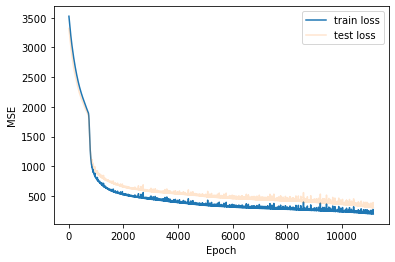

In [183]:
plt.plot(mse_history_another[400::], label='train loss', alpha = 1)
plt.plot(mse_history_another_test[400::], label='test loss', alpha = 0.2)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

Из графика видно, что переобучения нет.

In [184]:
# Считаем метрики
# Количество эпох
print("Эпох:", epoch)

# Тестовые значения исследуемого признака 
test_labels = torch.tensor(y_test.values.reshape(-1,1)).float()

# Подсчет средней квадротичной ошибки
mse = criterion(predicted_labels, torch.tensor(y_test.values.reshape(-1,1)).float()).item()
print("MSE:", mse)

# Подсчет коэффициента детерминации
r2 = r2_score(test_labels.detach().numpy(), predicted_labels.detach().numpy())
print("R^2:", r2)

# Подсчет средней квадротичной ошибки
mae = mean_absolute_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy())
print("MAE:", mae)

# подсчитываем квадратный корень из MSE
rmse = math.sqrt(mean_squared_error(test_labels.detach().numpy(),  predicted_labels.detach().numpy()))
print("RMSE:", rmse)

Эпох: 11560
MSE: 305.0254821777344
R^2: 0.9932022563463392
MAE: 13.255083
RMSE: 17.464977860282453


Визуализация изменения ошибки для тестовой выборки

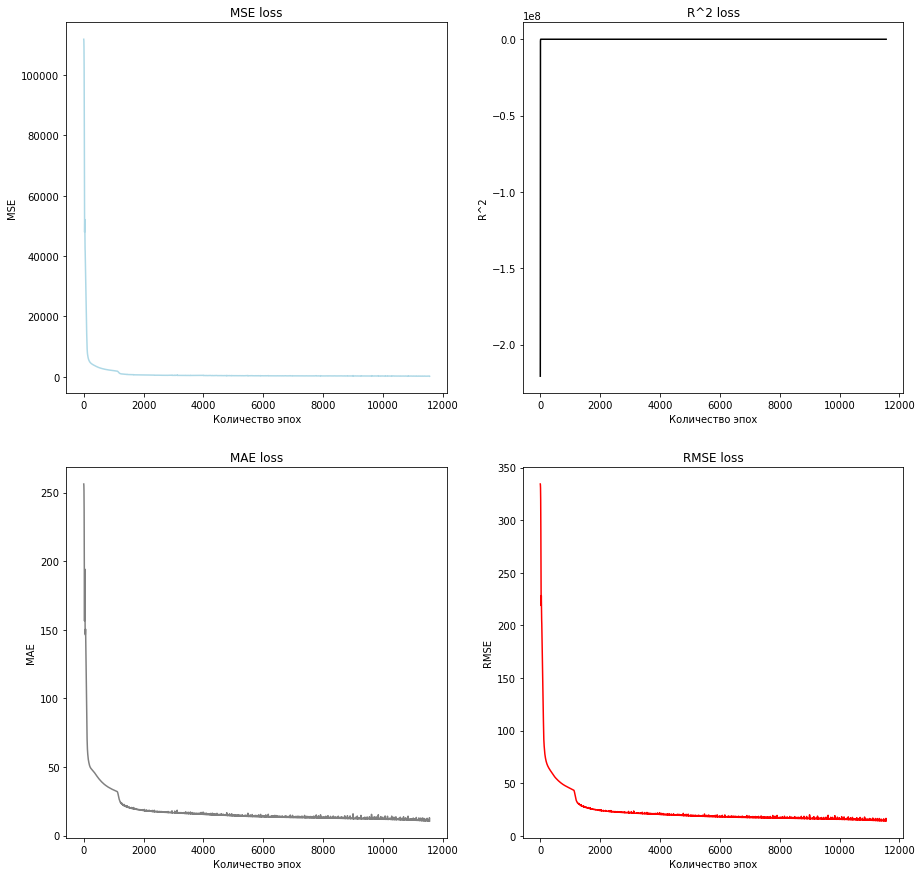

In [185]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Первый график
axs[0, 0].plot([i for i in range(len(mse_history_another))], mse_history_another, color = 'lightblue')
axs[0, 0].set_title('MSE loss')
axs[0, 0].set_xlabel('Количество эпох')
axs[0, 0].set_ylabel('MSE')

# Второй график
axs[0, 1].plot([i for i in range(len(r2_history_another))], r2_history_another, color = 'black')
axs[0, 1].set_title('R^2 loss')
axs[0, 1].set_xlabel('Количество эпох')
axs[0, 1].set_ylabel('R^2')

# Третий график
axs[1, 0].plot([i for i in range(len(mae_history_another))], mae_history_another, color = 'grey')
axs[1, 0].set_title('MAE loss')
axs[1, 0].set_xlabel('Количество эпох')
axs[1, 0].set_ylabel('MAE')

# Четвертый график
axs[1, 1].plot([i for i in range(len(rmse_history_another))], rmse_history_another, color = 'red')
axs[1, 1].set_title('RMSE loss')
axs[1, 1].set_xlabel('Количество эпох')
axs[1, 1].set_ylabel('RMSE')

plt.show()

In [194]:
num_of_items = 150
true_values = torch.tensor(y_test.values.reshape(-1,1)).detach().numpy()[:num_of_items:]
pred_values = predicted_labels.detach().numpy()[:num_of_items:]

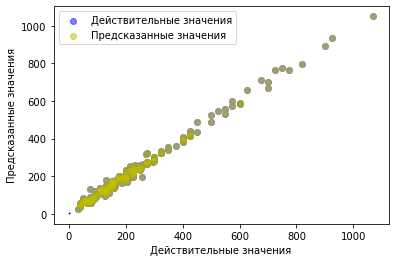

In [200]:
plt.scatter(true_values,pred_values, c='b', label='Действительные значения',  alpha=0.5)
plt.scatter(true_values, pred_values, c='y', label='Предсказанные значения',  alpha=0.5)
plt.plot([0, 5], [0, 5], 'k--')
plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

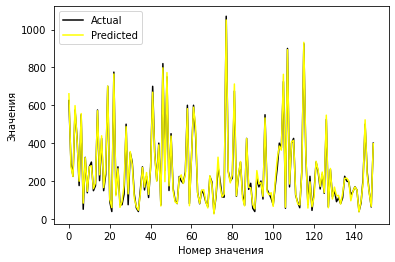

In [197]:
plt.plot(true_values, label='Actual', alpha = 1, color = 'black')
plt.plot(pred_values, label='Predicted',  alpha = 1, color='yellow')
plt.legend()
plt.xlabel('Номер значения')
plt.ylabel('Значения')
plt.show()

In [193]:
# Вычисляем процент максимального расхождения
diff = np.abs(pred_values - true_values)
max_diff_percent = 100 * np.max(diff) / np.max(np.abs(pred_values - np.mean(pred_values)))
print("Максимальное расхождение:", round(max_diff_percent,2), "%")

Максимальное расхождение: 7.43 %


### Сравнение MSE трех моделей

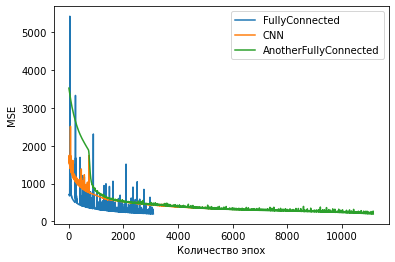

In [203]:
#x = [i for i in range(len(10000))]
y1 = mse_history[400::]
y2 = mse_history_cnn[400::]
y3 = mse_history_another[400::]
plt.plot(y1, label='FullyConnected')
plt.plot(y2, label='CNN')
plt.plot(y3, label='AnotherFullyConnected')

# Добавляем легенду и название осей
plt.legend()
plt.xlabel('Количество эпох')
plt.ylabel('MSE')

# Отображаем график
plt.show()

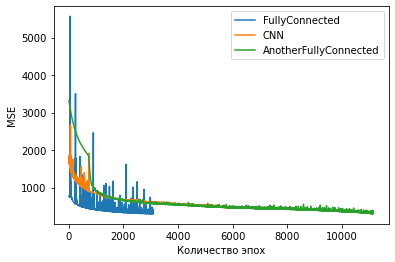

In [202]:
#x = [i for i in range(len(10000))]
y1 = mse_history_test[400::]
y2 = mse_history_cnn_test[400::]
y3 = mse_history_another_test[400::]
plt.plot(y1, label='FullyConnected')
plt.plot(y2, label='CNN')
plt.plot(y3, label='AnotherFullyConnected')

# Добавляем легенду и название осей
plt.legend()
plt.xlabel('Количество эпох')
plt.ylabel('MSE')

# Отображаем график
plt.show()